In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_path = "/data/work/shared/safe_data/sleep_skew/skew_project_start_oct_2022/"
sleep_sample = pd.read_csv(file_path+"sleep_skew_project_data.csv")
sleep_sample['sleep_start'] = pd.to_datetime(sleep_sample['day_label_start'],unit='d')
sleep_sample['sleep_start_shift'] = pd.to_datetime(sleep_sample['day_label_shift'],unit='d')
sleep_sample.head()

user_id  day_label_start  day_label_shift  weekday  weekend  \
0       79            17957            17956        4        1   
1       79            17955            17955        3        0   
2       79            18034            18033        4        1   
3       79            17984            17984        4        1   
4       79            17434            17434        0        0   

   start_time_num_round  end_time_num_round  sleep_duration_round sleep_start  \
0                  0.75                6.75                  6.00  2019-03-02   
1                 23.25                8.25                  8.25  2019-02-28   
2                  1.25                6.75                  5.50  2019-05-18   
3                 13.25               15.50                  2.25  2019-03-29   
4                 13.25               15.75                  2.25  2017-09-25   

  sleep_start_shift  
0        2019-03-01  
1        2019-02-28  
2        2019-05-17  
3        2019-03-29  
4        2017-09-25

In [21]:
len(sleep_sample)

32122611

In [3]:
from itertools import product 
# all combinations of dates and userid (synthetic)
# user_day_comb = list(product(np.unique(sleep_sample['user_id']),np.unique(sleep_sample['sleep_start_shift'])))
# user_day_comb = pd.DataFrame(user_day_comb)
# user_day_comb.columns=['user_id','sleep_start_shift']
# user_day_comb['sleep_start_yyyymm'] = pd.to_datetime(user_day_comb['sleep_start_shift']).dt.to_period('M')

# user_day_comb = pd.read_csv("/data/work/shared/s210142/user_day_comb.csv")
#unique (available) combinations of user if and night sleep date from data
# sleep_sample_uniq = sleep_sample[['user_id','sleep_start_shift']].drop_duplicates()
# sleep_sample_uniq['occur'] = 1
# sleep_sample_uniq.sort_values(by=['user_id','sleep_start_shift'],inplace=True)
# sleep_sample_uniq.head()

# user_day_comb = user_day_comb.merge(sleep_sample_uniq,how='left',left_on=['user_id','sleep_start_shift'],
#                                    right_on=['user_id','sleep_start_shift'])
# user_day_comb['_mult'] = user_day_comb['sleep_start_shift'].astype(int)*user_day_comb['occur']

# user_day_comb.to_csv("/data/work/shared/s210142/user_day_comb.csv")

In [4]:
user_day_comb = pd.read_csv("/data/work/shared/s210142/user_day_comb.csv")
day_yymm = user_day_comb[['sleep_start_shift','sleep_start_yyyymm']].drop_duplicates()
print(len(day_yymm))
day_yymm.head(n=2)

1461


sleep_start_shift sleep_start_yyyymm
0        2015-06-01            2015-06
1        2015-06-02            2015-06

In [5]:
user_sleep_days_pivot = user_day_comb.pivot(index='user_id',columns='sleep_start_shift',values='occur')
user_sleep_days_pivot.head()

sleep_start_shift  2015-06-01  2015-06-02  2015-06-03  2015-06-04  2015-06-05  \
user_id                                                                         
1                         NaN         NaN         NaN         NaN         NaN   
2                         NaN         NaN         NaN         NaN         NaN   
3                         NaN         NaN         NaN         NaN         NaN   
4                         NaN         NaN         NaN         NaN         NaN   
5                         NaN         NaN         NaN         NaN         NaN   

sleep_start_shift  2015-06-06  2015-06-07  2015-06-08  2015-06-09  2015-06-10  \
user_id                                                                         
1                         NaN         NaN         NaN         NaN         NaN   
2                         NaN         NaN         NaN         NaN         NaN   
3                         NaN         NaN         NaN         NaN         NaN   
4                         NaN         NaN         NaN         NaN         NaN   
5                         NaN         NaN         NaN         NaN         NaN   

sleep_start_shift  ...  2019-05-22  2019-05-23  2019-05-24  2019-05-25  \
user_id            ...                                                   
1                  ...         NaN         NaN         NaN         NaN   
2                  ...         NaN         NaN         NaN         NaN   
3                  ...         NaN         NaN         NaN         NaN   
4                  ...         NaN         NaN         NaN         NaN   
5                  ...         NaN         NaN         NaN         NaN   

sleep_start_shift  2019-05-26  2019-05-27  2019-05-28  2019-05-29  2019-05-30  \
user_id                                                                         
1                         NaN         NaN         NaN         NaN         NaN   
2                         NaN         NaN         NaN         NaN         NaN   
3                         NaN         NaN         NaN         NaN         NaN   
4                         NaN         NaN         NaN         NaN         NaN   
5                         NaN         NaN         NaN         NaN         NaN   

sleep_start_shift  2019-05-31  
user_id                        
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  
5                         NaN  

[5 rows x 1461 columns]

In [6]:

#calculating the weighted average at user level and storing it in a separate dataframe
user_level_wavg = user_day_comb[['user_id','_mult']].groupby('user_id').mean()
user_level_wavg['_mult'] = user_level_wavg['_mult']/1e+17 #just scaling down the weighted average

In [7]:
user_sleep_days_pivot = user_sleep_days_pivot.merge(user_level_wavg,
                                                    how='left',left_on='user_id',right_on = 'user_id')
user_sleep_days_pivot.sort_values(by=['_mult'],inplace=True)
user_sleep_days_pivot.drop(columns=['_mult'],inplace=True) # to unaccount it in the heatmap

# Plots : 1a :: Missing data

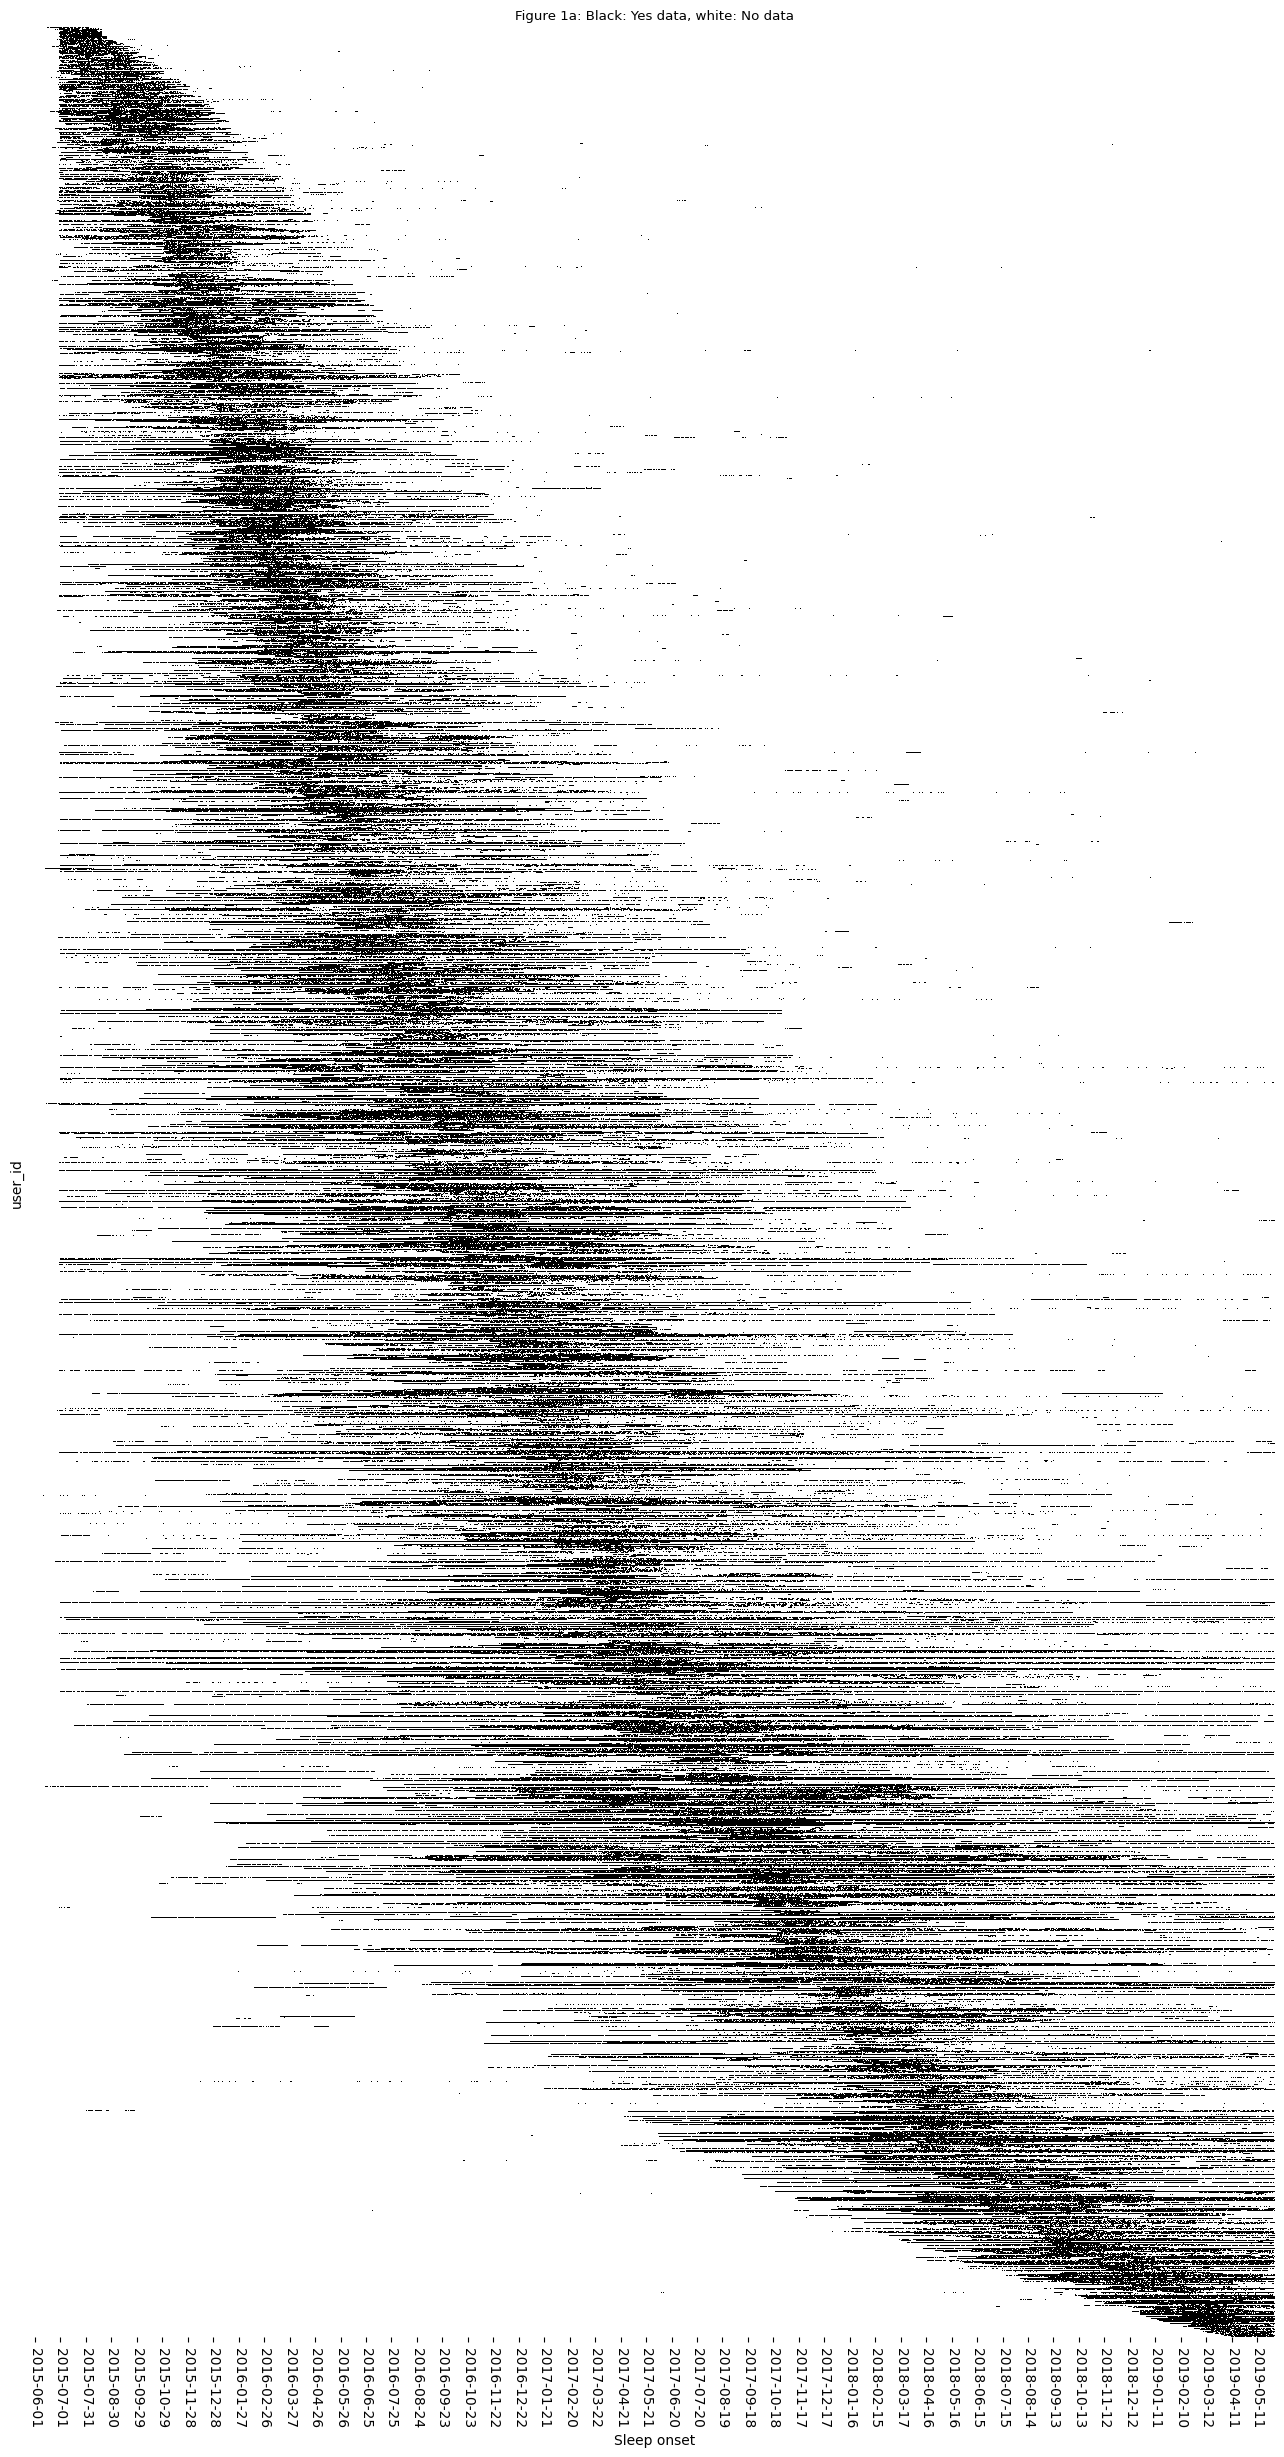

In [8]:
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.dates as mdates
binary_colors = ['white','black']
my_colors = ListedColormap(binary_colors)
bounds = [0,1]
my_norm = BoundaryNorm(bounds,ncolors=len(binary_colors))
fig,axs = plt.subplots(figsize=(16,30))
sns.set_context("paper")
sns.heatmap(user_sleep_days_pivot,ax = axs,yticklabels=False, xticklabels=30,
            cmap = my_colors,
            norm = my_norm,
            cbar = False)
# axs.set_xticklabels(pd.to_datetime(day_yymm['sleep_start_shift']).dt.strftime("%m-%Y"))

plt.xticks(rotation=-90)
plt.xlabel("Sleep onset")
plt.title("Figure 1a: Black: Yes data, white: No data")

plt.show()

In [9]:
sleep_sample_uniq_dur = sleep_sample[['user_id',
                                      'sleep_start_shift',
                                      'sleep_duration_round']].drop_duplicates(subset=['user_id','sleep_start_shift'],
                                                                               keep = 'first')
print(len(sleep_sample_uniq_dur))

user_sleep_dur_pivot = sleep_sample_uniq_dur.pivot(index='user_id',
                                                          columns='sleep_start_shift',values='sleep_duration_round')
# user_sleep_dur_pivot.columns
user_sleep_dur_pivot = user_sleep_dur_pivot.merge(user_level_wavg,
                                                    how='left',left_on='user_id',right_on = 'user_id')
user_sleep_dur_pivot.sort_values(by=['_mult'],inplace=True)
user_sleep_dur_pivot.drop(columns=['_mult'],inplace=True) # to unaccount it in the heatmap
print(len(user_sleep_dur_pivot))
user_sleep_dur_pivot.head()

31869129
127556


2015-06-01  2015-06-02  2015-06-03  2015-06-04  2015-06-05  \
user_id                                                               
116475          NaN         NaN         NaN         NaN         NaN   
89696           NaN        2.75         4.0        2.50        8.25   
10955           NaN         NaN         NaN        5.25        7.25   
122830          NaN         NaN         NaN         NaN         NaN   
92078           NaN         NaN         NaN         NaN         NaN   

         2015-06-06  2015-06-07  2015-06-08  2015-06-09  2015-06-10  ...  \
user_id                                                              ...   
116475          NaN        8.75         5.5         9.0        8.50  ...   
89696          6.25         NaN         NaN         6.5        5.25  ...   
10955          9.75        8.50         4.5         8.5        6.50  ...   
122830          NaN         NaN         NaN         NaN         NaN  ...   
92078           NaN         NaN         NaN         NaN         NaN  ...   

         2019-05-22  2019-05-23  2019-05-24  2019-05-25  2019-05-26  \
user_id                                                               
116475          NaN         NaN         NaN         NaN         NaN   
89696           NaN         NaN         NaN         NaN         NaN   
10955           NaN         NaN         NaN         NaN         NaN   
122830          NaN         NaN         NaN         NaN         NaN   
92078           NaN         NaN         NaN         NaN         NaN   

         2019-05-27  2019-05-28  2019-05-29  2019-05-30  2019-05-31  
user_id                                                              
116475          NaN         NaN         NaN         NaN         NaN  
89696           NaN         NaN         NaN         NaN         NaN  
10955           NaN         NaN         NaN         NaN         NaN  
122830          NaN         NaN         NaN         NaN         NaN  
92078           NaN         NaN         NaN         NaN         NaN  

[5 rows x 1461 columns]

# Plots 1b: Heatmap: Sleep durations

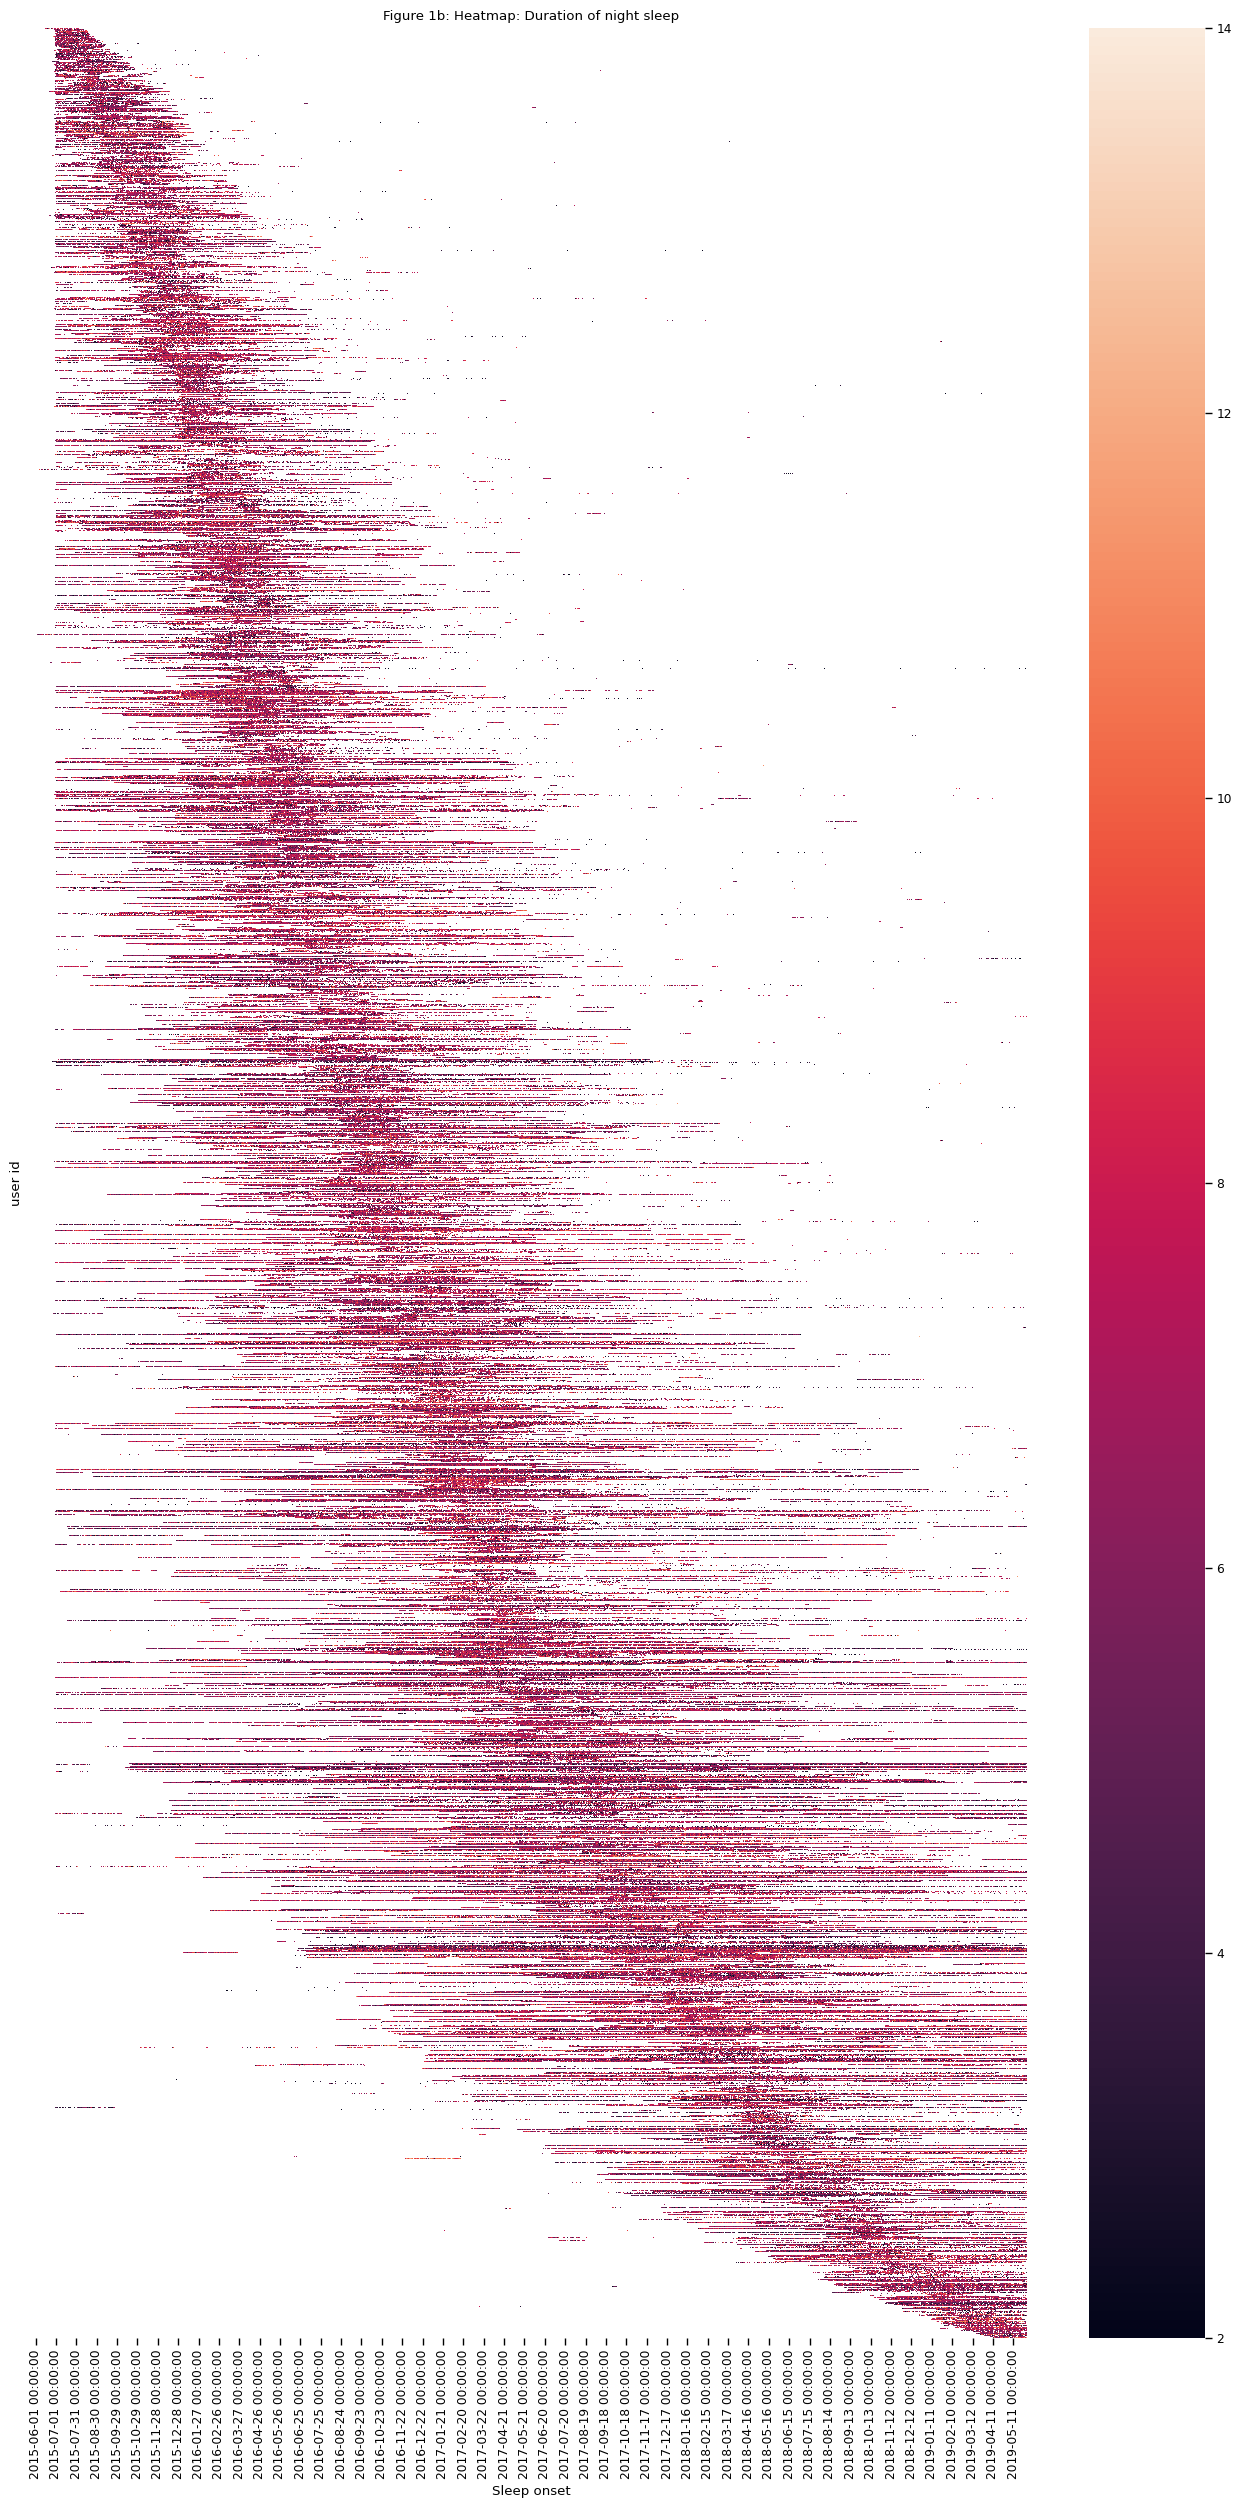

In [10]:
import matplotlib.dates as mdates
fig,axs = plt.subplots(figsize=(16,30))
sns.set_context("paper")
sns.heatmap(user_sleep_dur_pivot,ax = axs,yticklabels=False,xticklabels=30)
plt.title("Figure 1b: Heatmap: Duration of night sleep")
plt.ylabel("user id")
plt.xlabel("Sleep onset")

plt.show()

# Plots: 2 :: Distribution of user frequencies by count of sleep nights

[  17.  157.  297.  437.  577.  717.  857.  997. 1137. 1277. 1417.]


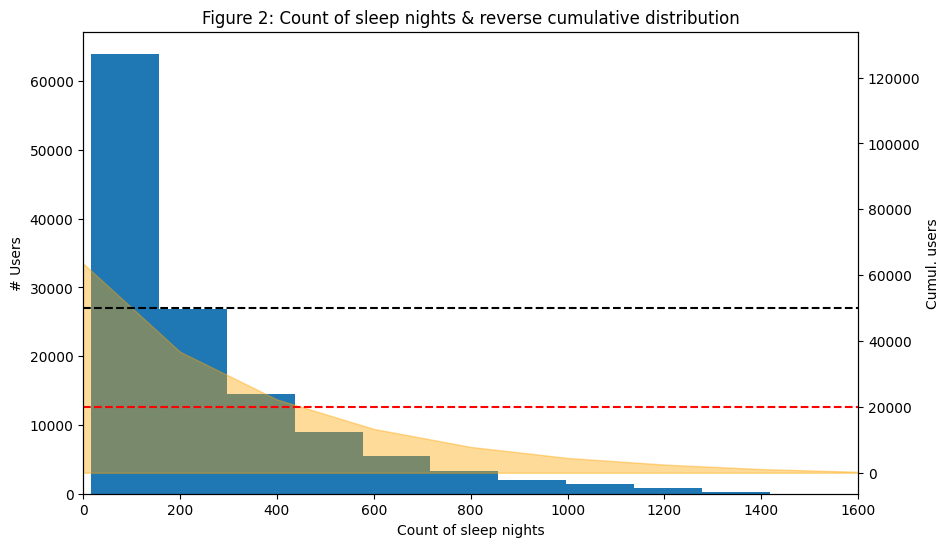

In [4]:
#excluding naps (sleep duration less than 2 hours)
user_counting_tmp = sleep_sample[sleep_sample['sleep_duration_round'] > 2][['user_id','sleep_start_shift']].drop_duplicates()
user_counting_nights = user_counting_tmp[['user_id']].groupby('user_id').size()
user_counting_nights = user_counting_nights.reset_index()
user_counting_nights.columns = ['user_id','NightCount']
fig,axs = plt.subplots(figsize=(10,6))

n ,bins, heights = axs.hist(user_counting_nights['NightCount'])
_x = axs.get_xticks()
plt.xlim(0,np.max(_x))
print(bins)
ax2 = axs.twinx()
n_res= n[::-1]

for i in range(1,len(n_res)):
    n_res[i] = n_res[i]+n_res[i-1]
n_res2 = n_res[::-1]

ax2.fill_between(_x,n_res2,color="orange",alpha = 0.4)
axs.set_xlabel("Count of sleep nights")
axs.set_ylabel("# Users")
ax2.set_ylabel("Cumul. users")
ax2.axhline(y=20000,color='red',linestyle='--')
ax2.axhline(y=50000,color='black',linestyle='--')
plt.title("Figure 2: Count of sleep nights & reverse cumulative distribution")
plt.show()

# Plots :3:: Individual distributions (~50, ~100, ~150, ~200, ~500)
## 3a

chosen users:  [96627, 116344, 85657, 7199, 85038, 3135, 109395, 37102, 57427, 52959, 27229, 106859, 30257, 49405, 20813, 30134, 56008, 101491, 16953, 113978]
skew values:  [-1.35, -1.1, -1.09, -0.9, -0.86, -0.81, -0.32, -0.25, -0.15, -0.08, -0.07, -0.05, -0.03, 0.13, 0.32, 0.36, 0.37, 0.47, 0.52, 0.7]


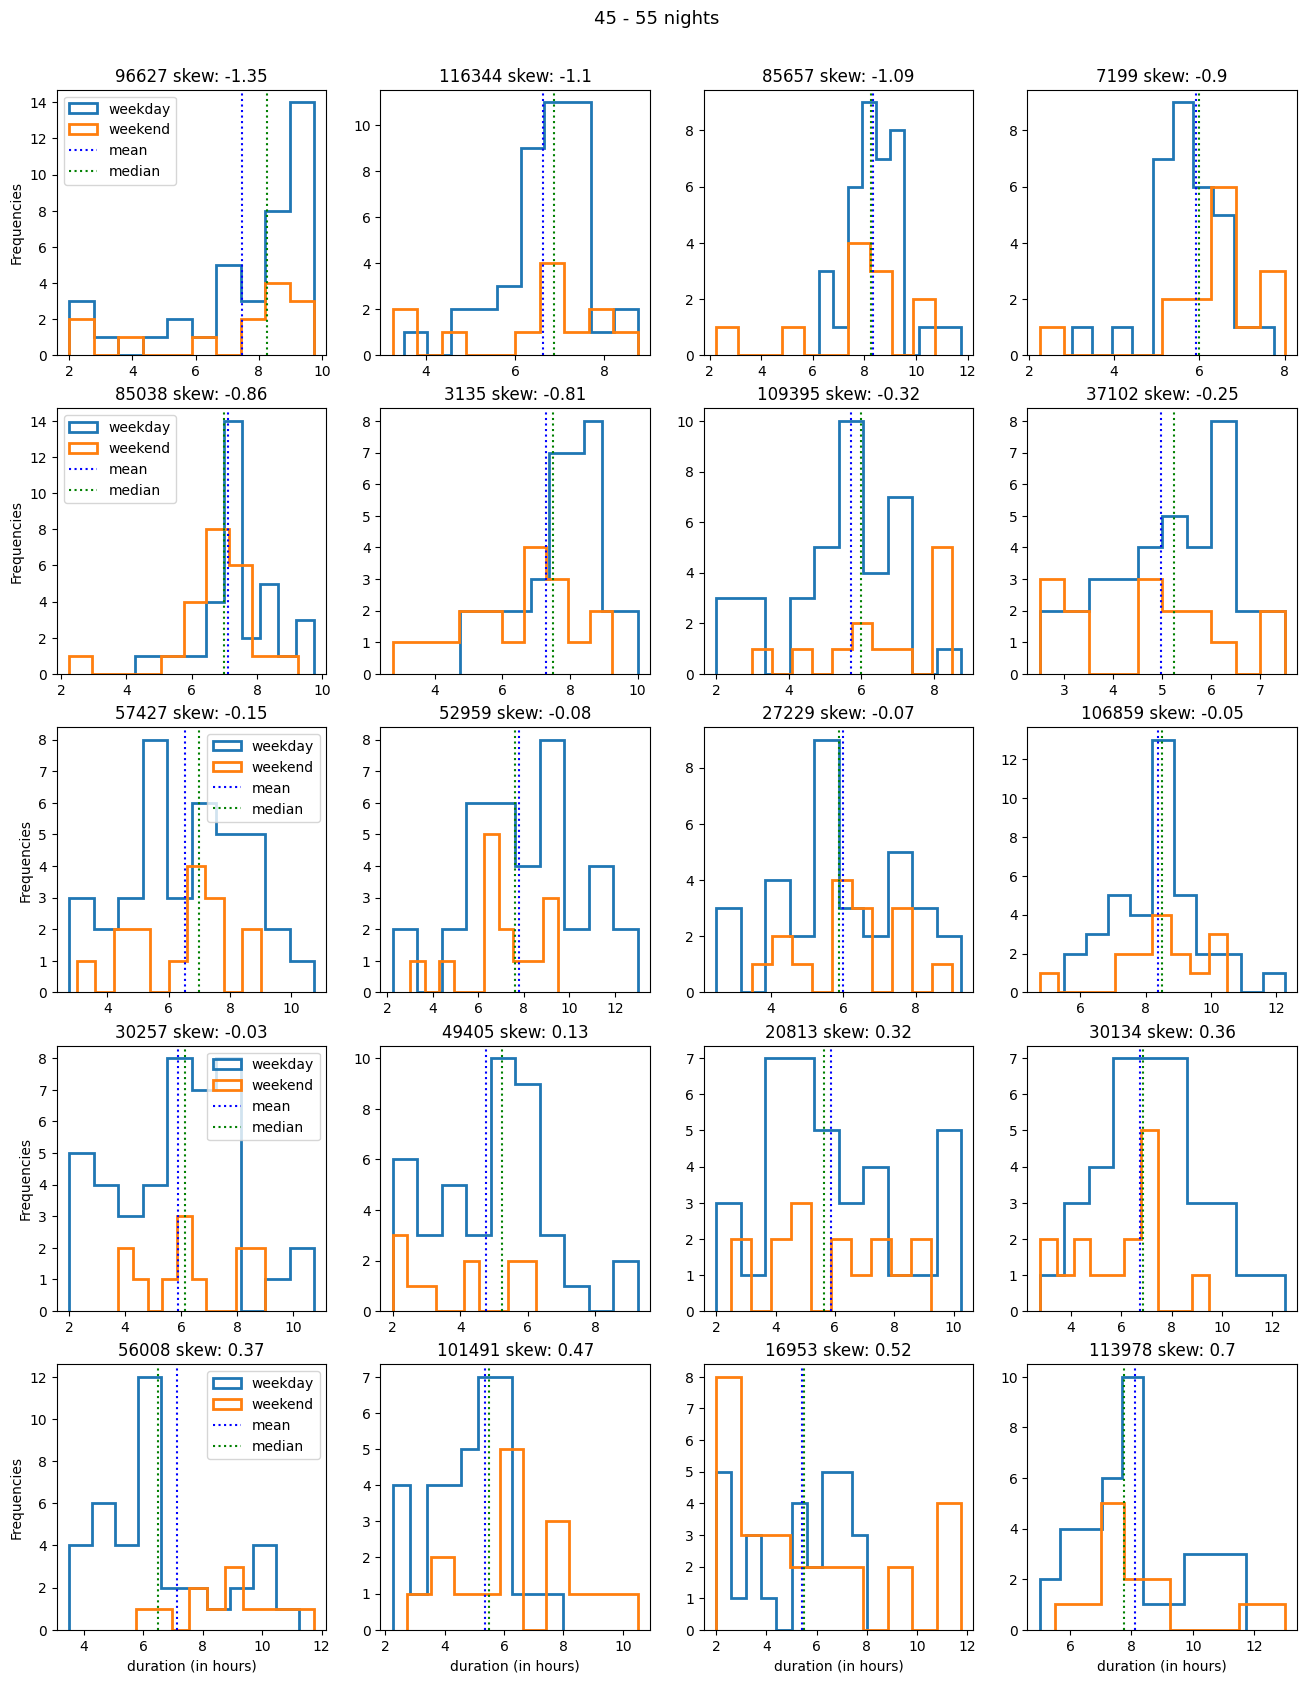

In [20]:
# identifying users with sleep data availability between 45-55 days
import warnings
warnings.filterwarnings("ignore")
import random
from scipy import stats
from scipy.stats import skew
k=20
def indiv_plots(num_nights):
    lowbin = num_nights - 5
    highbin = num_nights + 5
    sleep_45_55_nights = sleep_sample[sleep_sample['user_id'].isin(
        user_counting_nights[(user_counting_nights['NightCount']>= lowbin) & (
            user_counting_nights['NightCount']<= highbin)]['user_id'])]
    fig,axs = plt.subplots(5,4,figsize=(16,20))
    axs = axs.flatten()
    rndm_50nights = random.choices(np.unique(sleep_45_55_nights['user_id']),k=20)
#     weekday_mode_ge_5 = 0
#     weekend_mode_ge_5 = 0
#     count_skew = 0
    skew_array = []
    for user in rndm_50nights:
        dur_for_hist = np.array(sleep_sample[(sleep_sample['user_id']==user)][['sleep_duration_round']])

        skew_array.append(np.round(skew(dur_for_hist)[0],2))

    rndm_50nights1 = [x for _,x in sorted(zip(skew_array, rndm_50nights))]
    skew_array1 = [x for x in sorted(skew_array)]
    print("chosen users: ", rndm_50nights1)
    print("skew values: ", skew_array1)
    for i in range(len(rndm_50nights1)):
        user = rndm_50nights1[i]
#     for user in rndm_50nights1: 
        dur_for_hist = np.array(sleep_sample[(sleep_sample['user_id']==user) &
                                            (sleep_sample['weekend']==0)][['sleep_duration_round']])
#         weekday_mode = stats.mode(dur_for_hist)
#         if weekday_mode[0][0][0] >= 5:
#             weekday_mode_ge_5 += 1
        axs[i].hist(dur_for_hist,facecolor='#A52A2A',histtype = 'step',lw=2,label='weekday')
        dur_for_hist = np.array(sleep_sample[(sleep_sample['user_id']==user) &
                                            (sleep_sample['weekend']==1)][['sleep_duration_round']])
#         weekend_mode = stats.mode(dur_for_hist) 
#         if weekend_mode[0][0][0] >= 5:
#             weekend_mode_ge_5 += 1
        axs[i].hist(dur_for_hist,facecolor='#C19A6B',histtype = 'step', lw = 2,label='weekend')
        dur_for_hist = np.array(sleep_sample[sleep_sample['user_id']==user][['sleep_duration_round']])
        axs[i].axvline(x=np.mean(dur_for_hist),color='blue',linestyle = 'dotted',label='mean')
        axs[i].axvline(x=np.median(dur_for_hist),color='green', linestyle = 'dotted',label='median')
        txt = str(user)+" skew: "+str(skew_array1[i])
#                               +" stddev: "+str(np.round(np.std(dur_for_hist),2))
#         if abs(np.round(skew(dur_for_hist)[0],2)) > 0.5:
#             count_skew +=1
        axs[i].set_title(txt,fontsize=12)
        if i%4 == 0:
            axs[i].legend()
            axs[i].set_ylabel("Frequencies")
        if i >=16:
            axs[i].set_xlabel("duration (in hours)")
#     txt2 = str(lowbin)+" - "+str(highbin)+" nights: Sleep distributions of 20 randomly chosen individuals"
    txt2 = str(lowbin)+" - "+str(highbin)+ " nights"
#     +" nights: #||skew||> 0.5: "+str(count_skew)+"; weekday mode >= 5: "+str(weekday_mode_ge_5)+"; weekend mode >= 5: "+str(weekend_mode_ge_5)
    plt.suptitle(txt2,ha='center',x=0.5,y=0.92,fontsize=13)
    plt.show()

indiv_plots(50)

## 3b

chosen users:  [43565, 103602, 12115, 108875, 66147, 63724, 22215, 107631, 64977, 98624, 37471, 24013, 14798, 61358, 22551, 49014, 99822, 111841, 96406, 70384]
skew values:  [-0.93, -0.88, -0.85, -0.81, -0.76, -0.73, -0.7, -0.45, -0.4, -0.26, -0.25, -0.13, 0.05, 0.07, 0.12, 0.14, 0.21, 0.43, 0.63, 0.7]


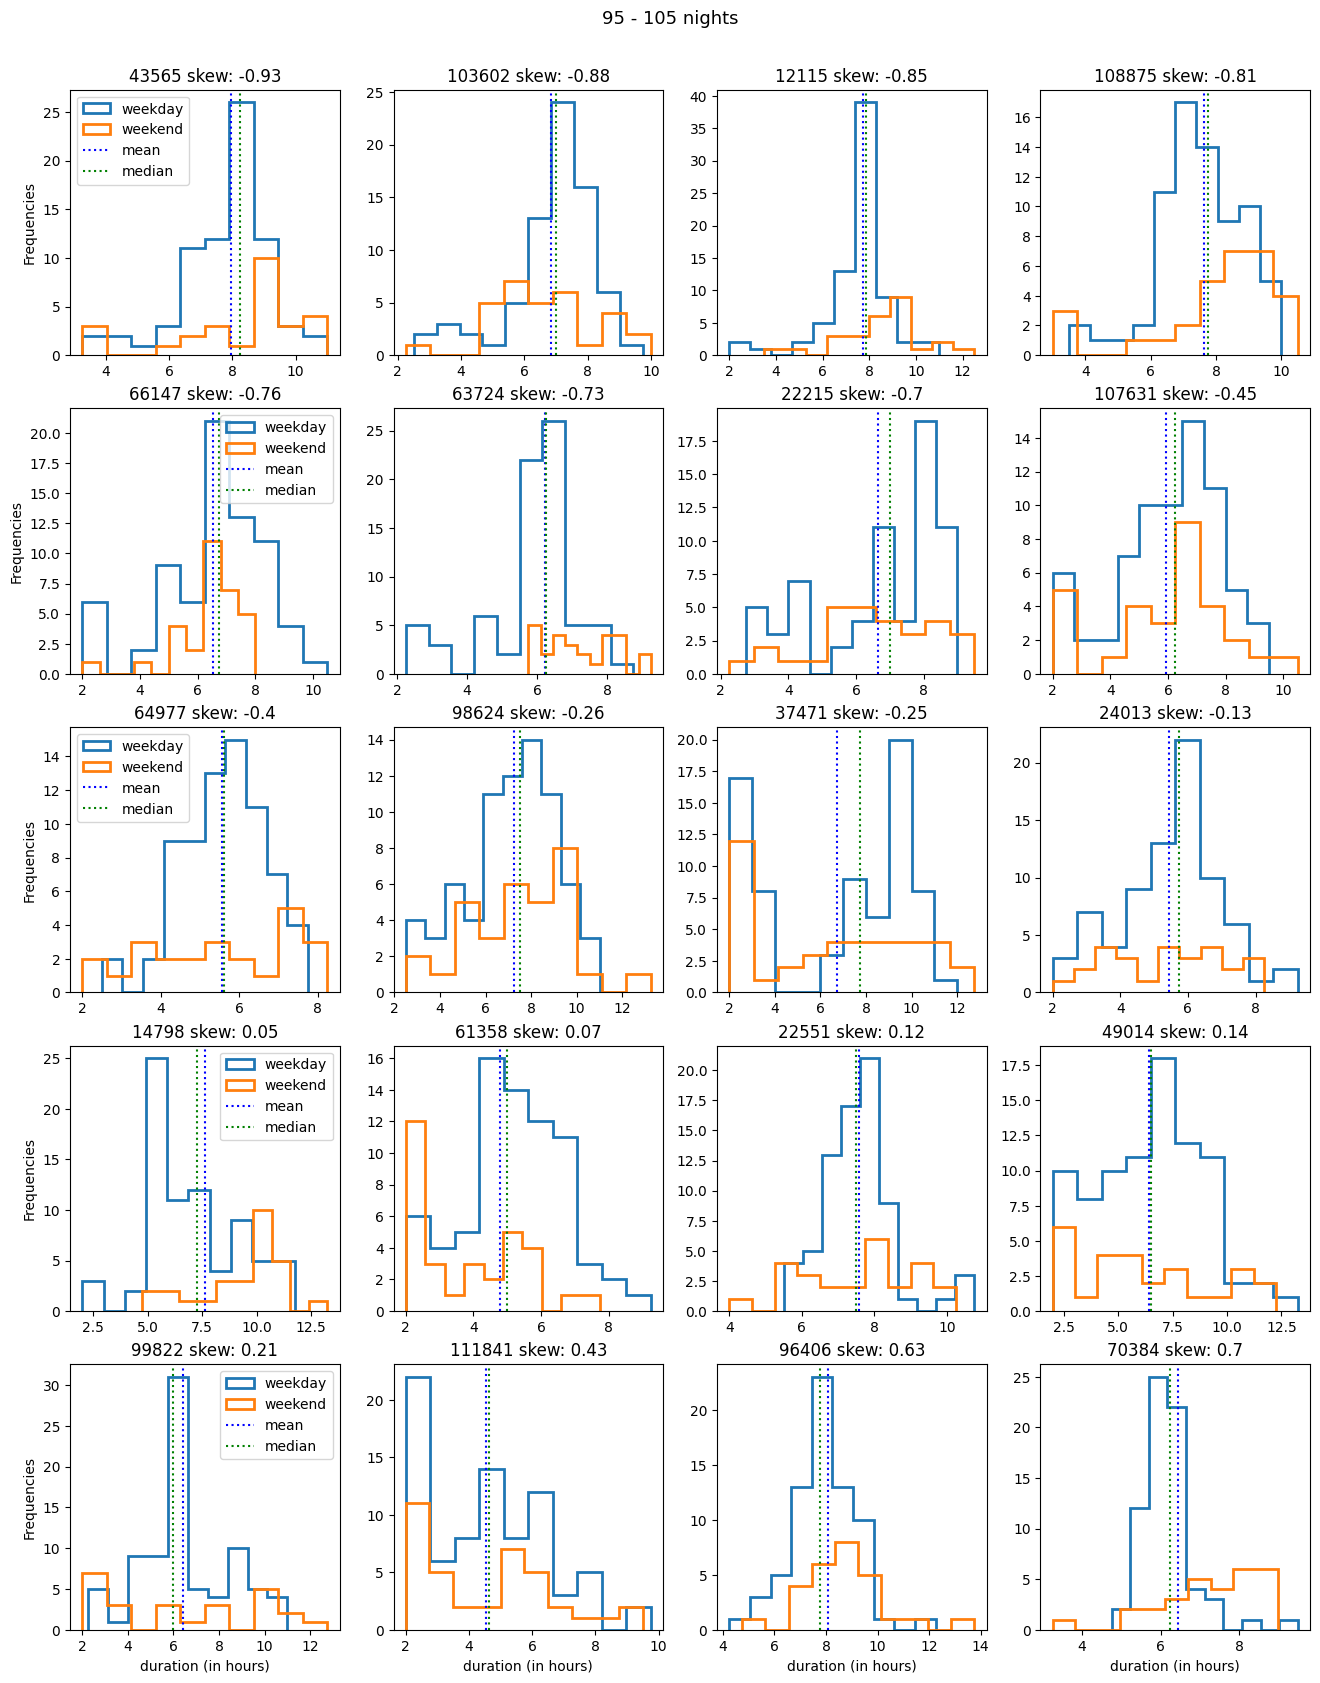

In [16]:
indiv_plots(100)

## 3c

chosen users:  [15522, 104309, 1876, 41126, 39480, 110751, 30037, 9055, 59426, 98663, 54657, 13071, 3541, 98095, 57937, 19973, 125311, 17085, 16969, 100376]
skew values:  [-1.5, -1.32, -1.18, -1.07, -1.06, -0.79, -0.78, -0.65, -0.58, -0.34, -0.26, -0.24, -0.18, -0.04, -0.03, 0.06, 0.06, 0.24, 0.3, 0.62]


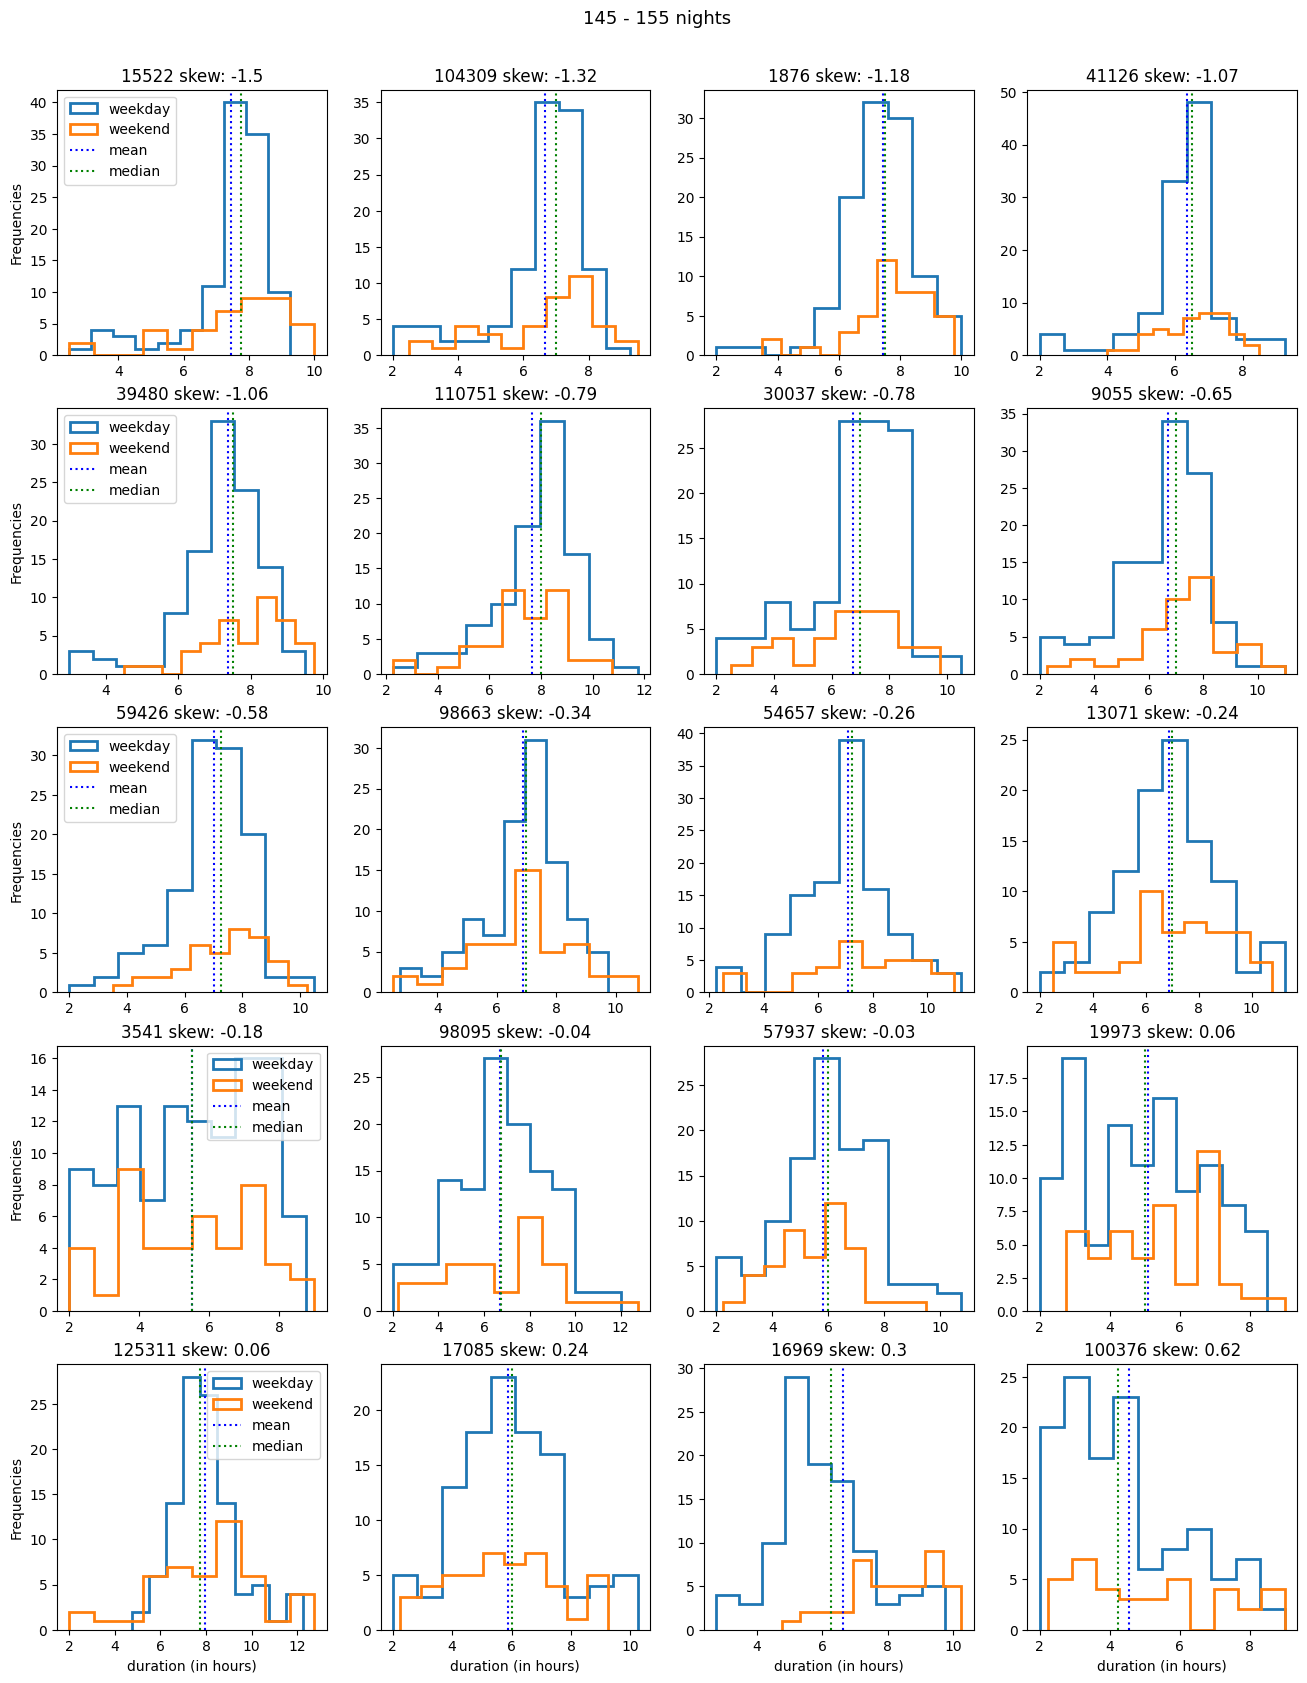

In [17]:
indiv_plots(150)

## 3d

chosen users:  [33359, 48005, 124409, 13156, 50837, 8884, 118243, 79712, 18801, 43794, 39473, 57572, 93687, 91335, 80718, 118882, 91911, 86553, 38896, 127433]
skew values:  [-0.78, -0.75, -0.72, -0.25, -0.15, -0.1, -0.07, -0.05, -0.0, 0.04, 0.1, 0.21, 0.26, 0.28, 0.3, 0.35, 0.47, 0.78, 0.86, 1.03]


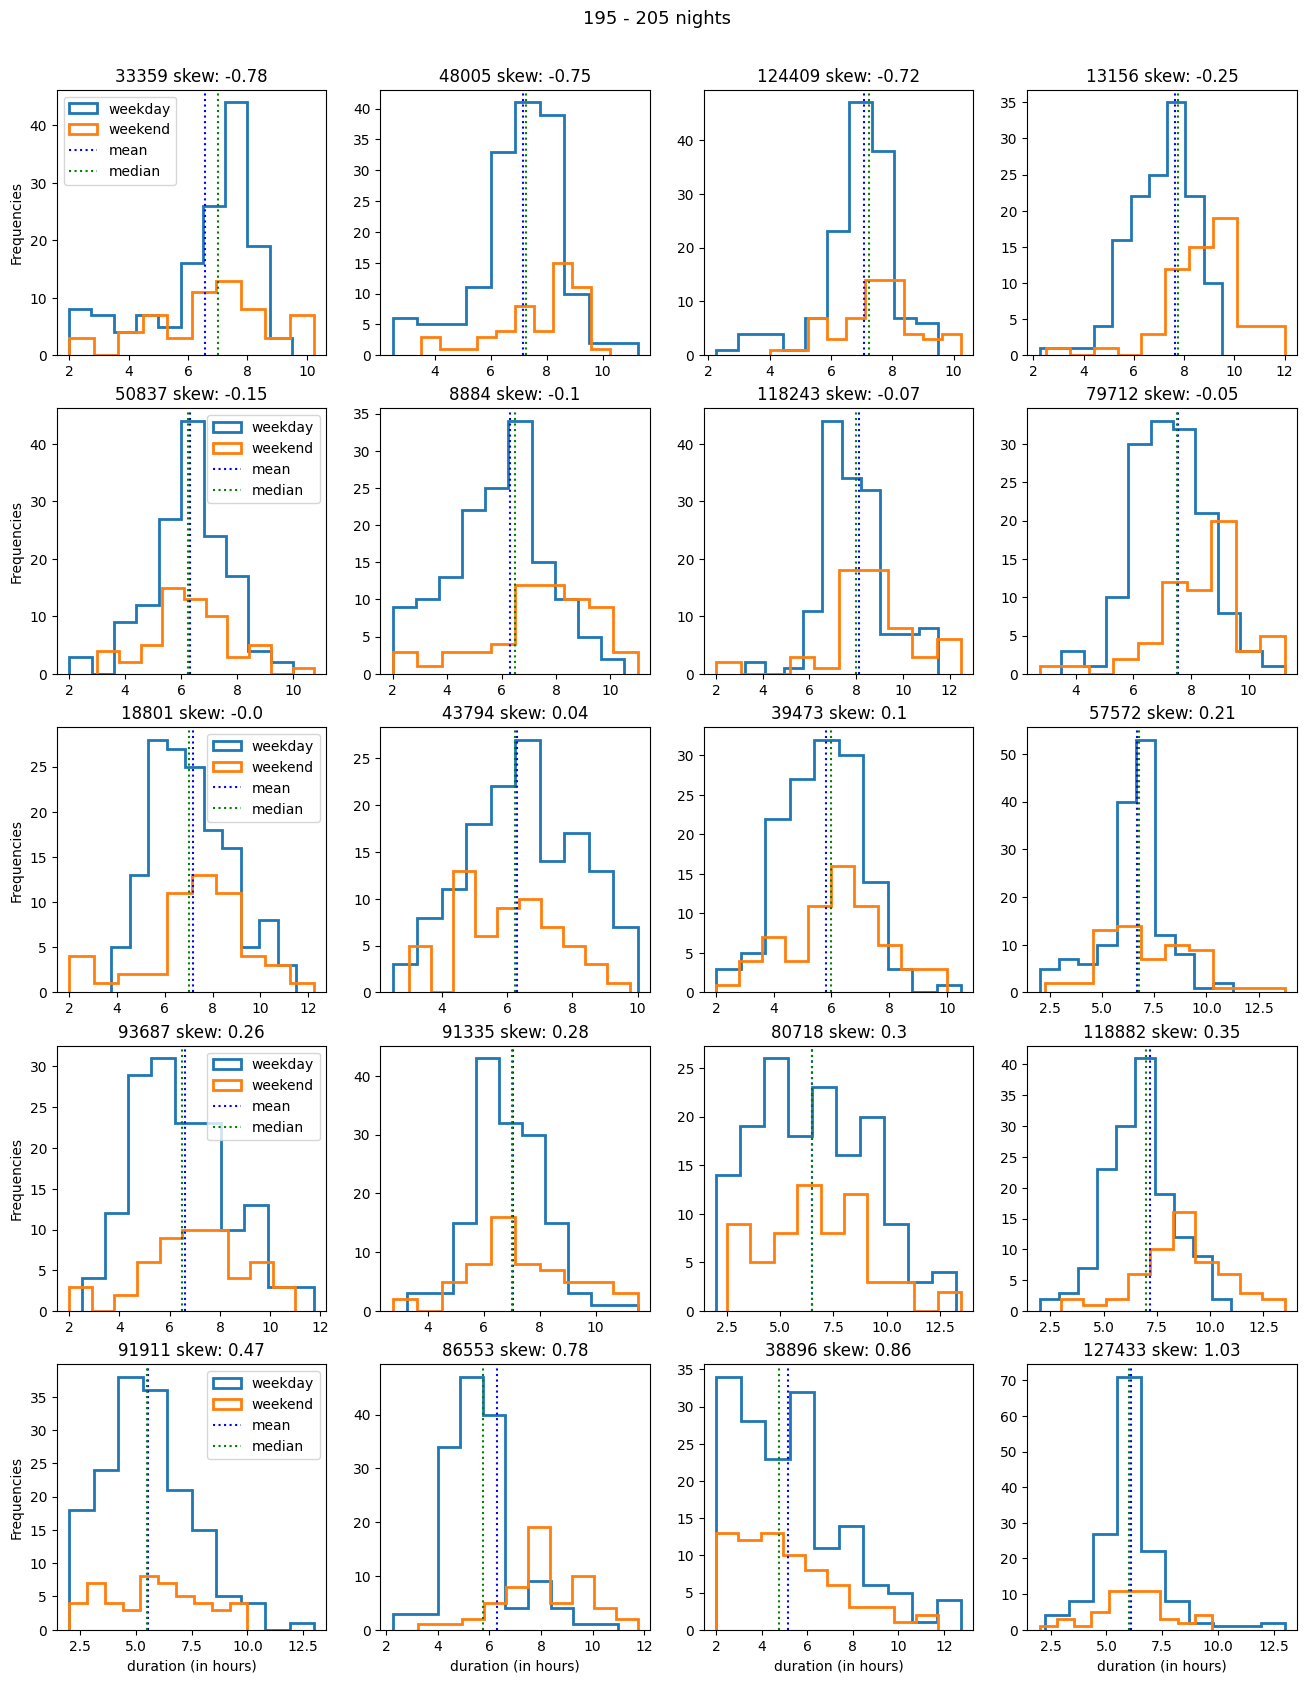

In [18]:
indiv_plots(200)

## 3e

chosen users:  [20347, 118684, 27902, 33986, 124219, 40407, 106678, 39618, 106013, 217, 114329, 62473, 120938, 910, 83475, 50732, 18268, 36863, 118913, 109931]
skew values:  [-1.16, -0.94, -0.86, -0.81, -0.7, -0.68, -0.57, -0.13, -0.13, -0.08, -0.0, 0.02, 0.09, 0.22, 0.26, 0.65, 0.67, 0.77, 0.83, 0.97]


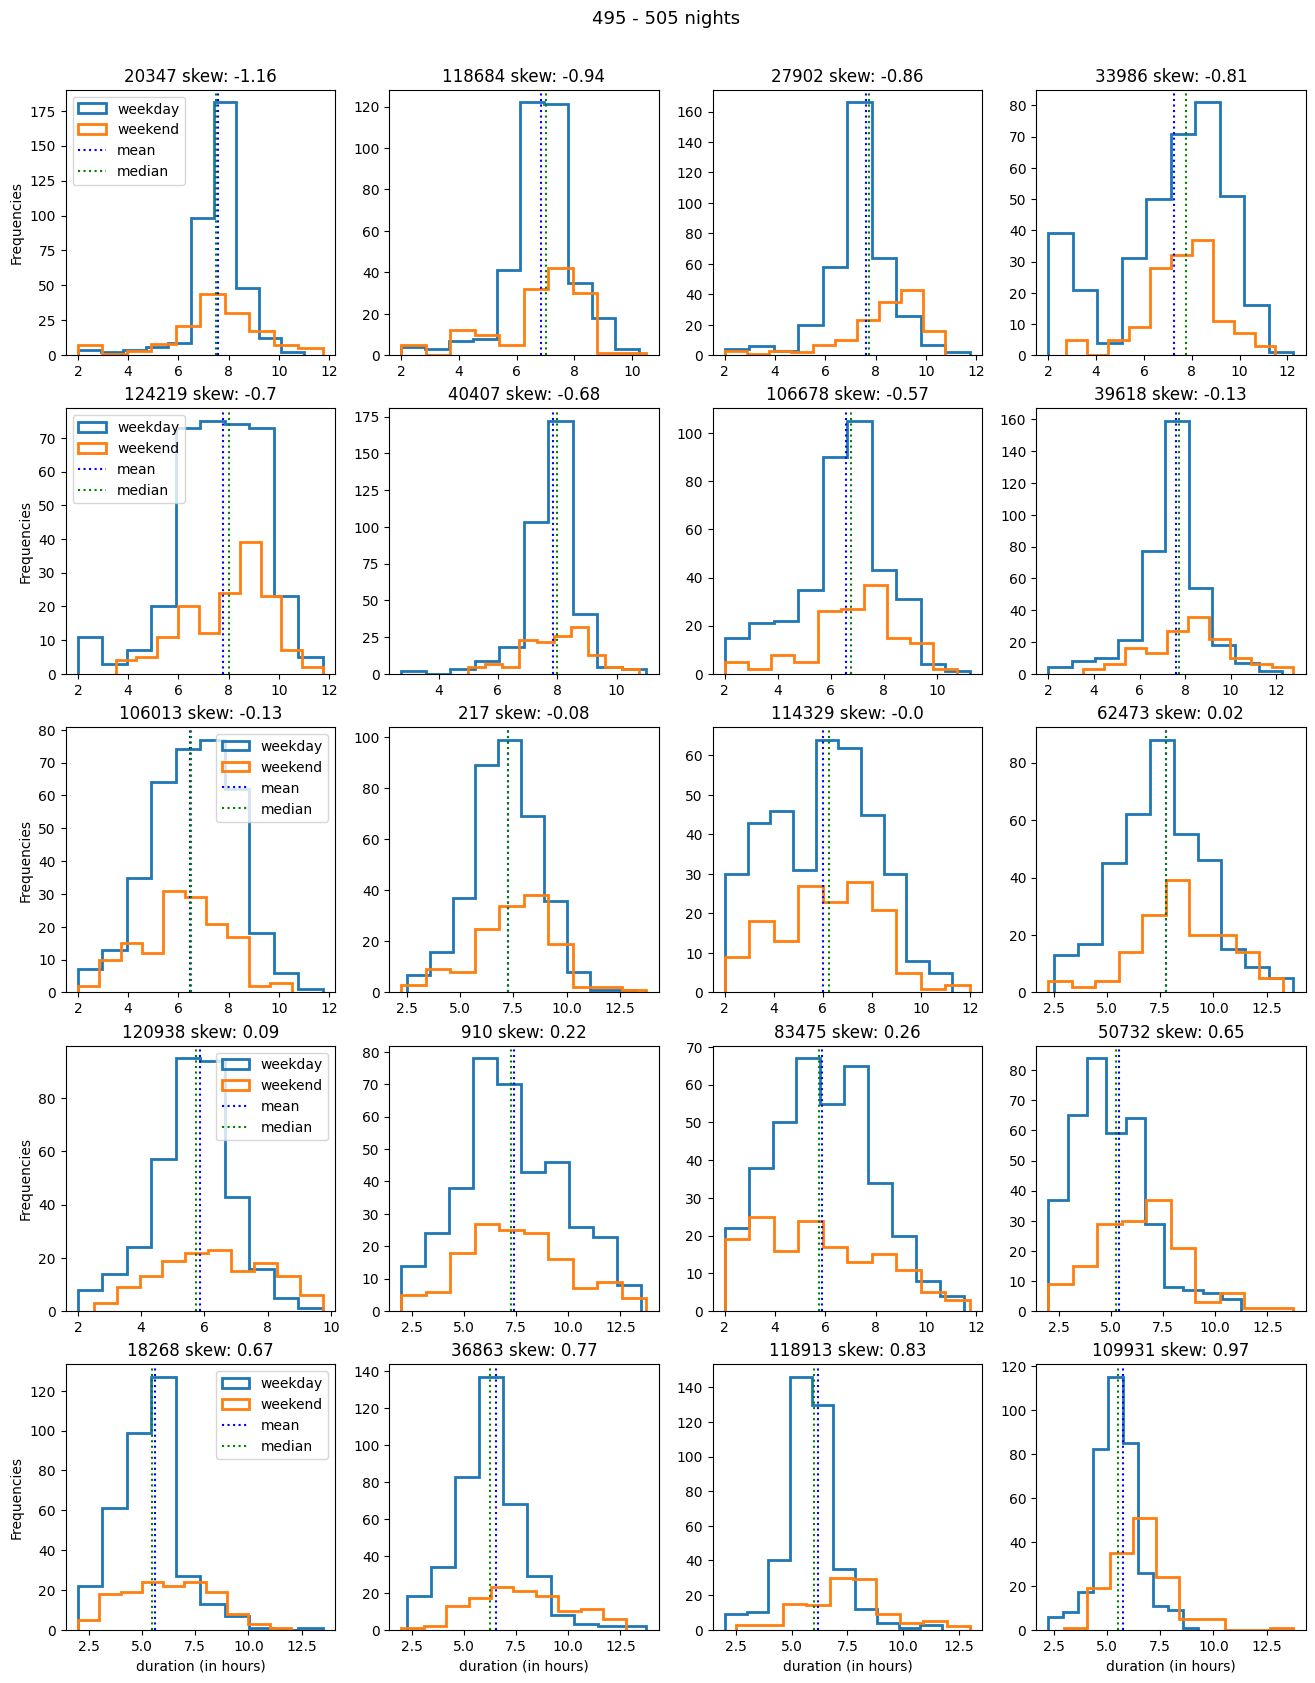

In [19]:
indiv_plots(500)

chosen users:  [103911, 14119, 81596, 21425, 54024, 72949, 19036, 34460, 32043, 124203, 31613, 97367, 69073, 62473, 17941, 101270, 115572, 25098, 120110, 4244]
skew values:  [-1.38, -0.96, -0.94, -0.78, -0.69, -0.65, -0.62, -0.24, -0.17, -0.12, -0.0, 0.03, 0.17, 0.19, 0.22, 0.43, 0.43, 0.57, 1.19, 1.34]


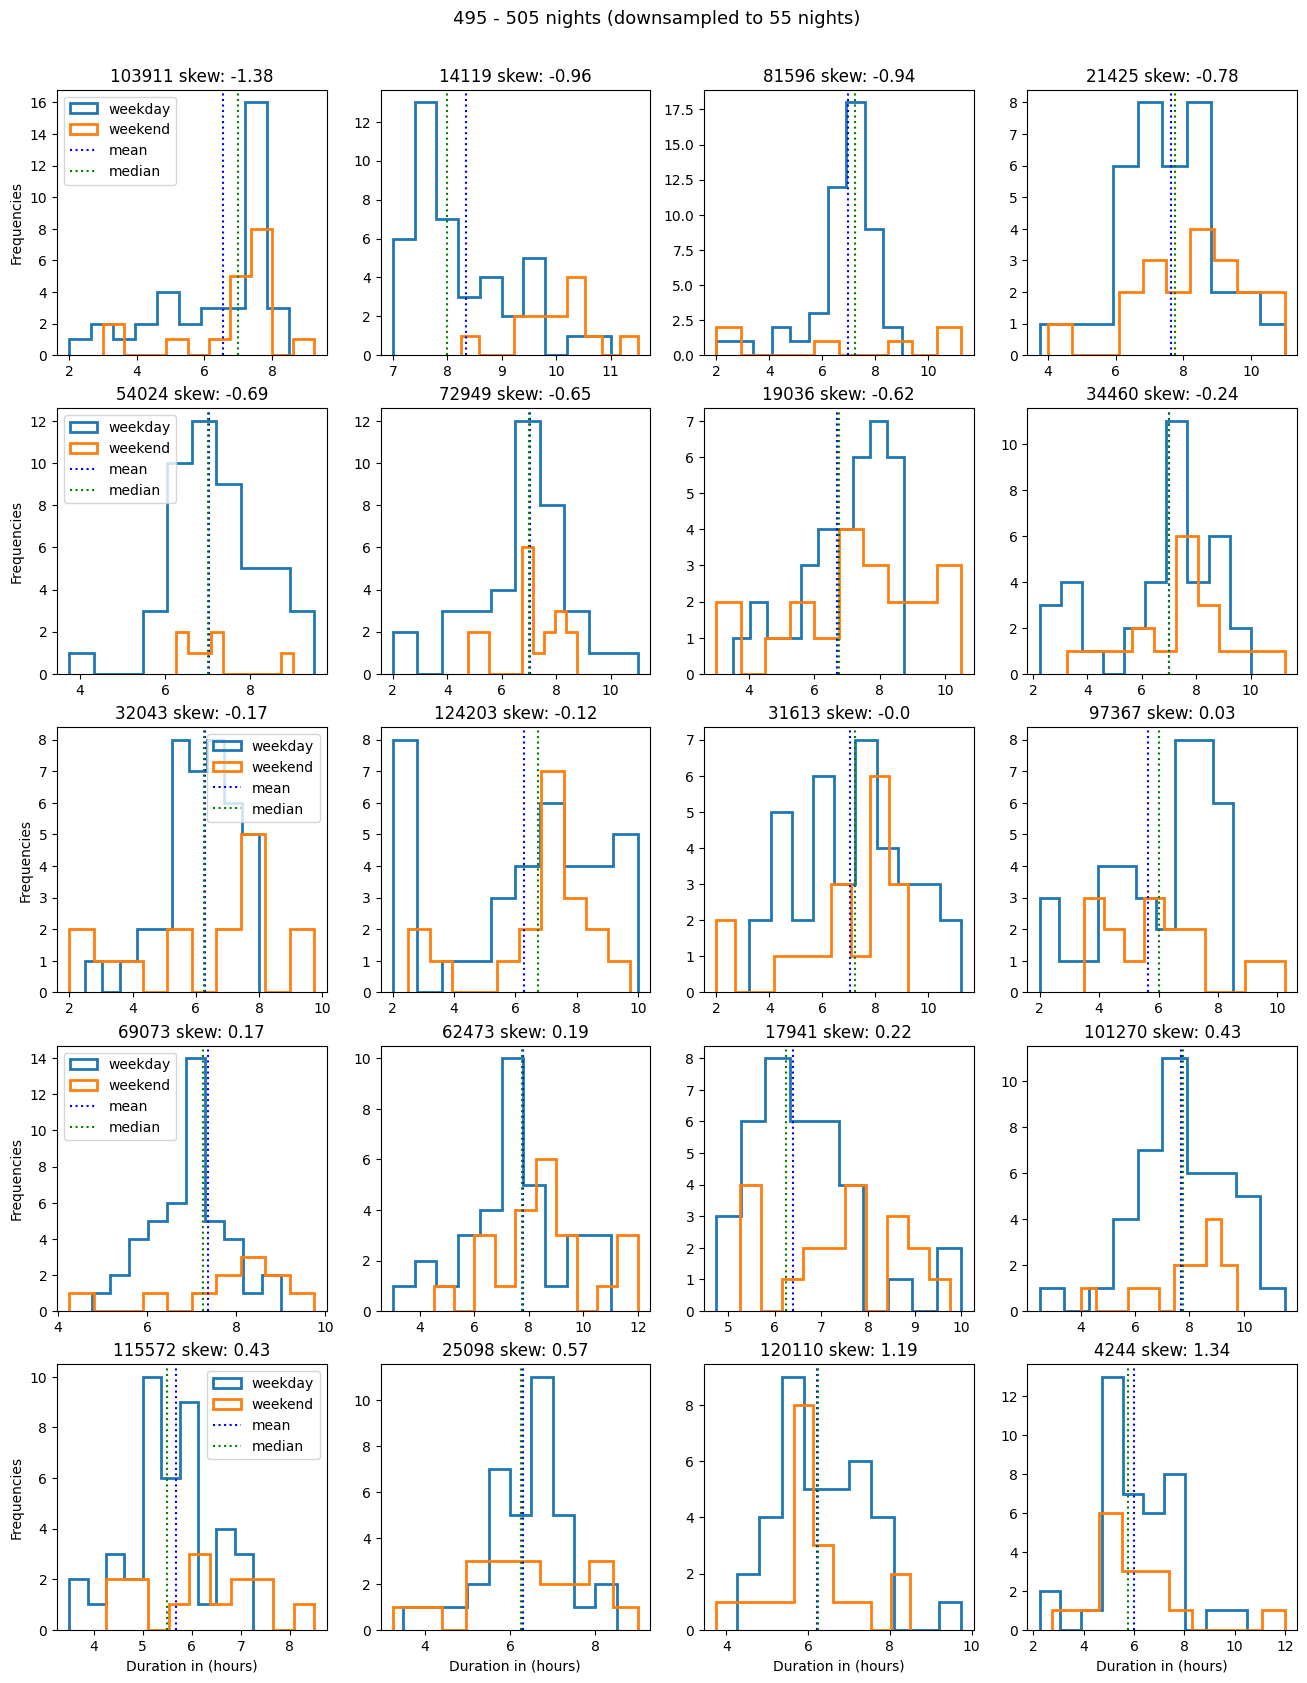

In [14]:
# identifying users with sleep data availability between 45-55 days
import warnings
warnings.filterwarnings("ignore")
import random
from scipy import stats
from scipy.stats import skew
k=20
def indiv_plots_downsampled(num_nights):
    lowbin = num_nights - 5
    highbin = num_nights + 5
    sleep_45_55_nights = sleep_sample[sleep_sample['user_id'].isin(
        user_counting_nights[(user_counting_nights['NightCount']>= lowbin) & (
            user_counting_nights['NightCount']<= highbin)]['user_id'])]
    fig,axs = plt.subplots(5,4,figsize=(16,20))
    axs = axs.flatten()
    rndm_50nights = random.choices(np.unique(sleep_45_55_nights['user_id']),k=20)

    skew_array = []
    for user in rndm_50nights:
        dur_for_hist_sample = sleep_sample[(sleep_sample['user_id']==user)].sample(n=55)
#         dur_for_hist = np.array(sleep_sample[(sleep_sample['user_id']==user)][['sleep_duration_round']])
        dur_for_hist = np.array(dur_for_hist_sample[['sleep_duration_round']])
        skew_array.append(np.round(skew(dur_for_hist)[0],2))

    rndm_50nights1 = [x for _,x in sorted(zip(skew_array, rndm_50nights))]
    skew_array1 = [x for x in sorted(skew_array)]
    print("chosen users: ", rndm_50nights1)
    print("skew values: ", skew_array1)
    for i in range(len(rndm_50nights1)):
        user = rndm_50nights1[i]

        dur_for_hist_sample = sleep_sample[(sleep_sample['user_id']==user)].sample(n=55)
#         dur_for_hist = np.array(sleep_sample[(sleep_sample['user_id']==user) &
#                                             (sleep_sample['weekend']==0)][['sleep_duration_round']])
        dur_for_hist = np.array(dur_for_hist_sample[(dur_for_hist_sample['user_id']==user) &
                                            (dur_for_hist_sample['weekend']==0)][['sleep_duration_round']])

        axs[i].hist(dur_for_hist,facecolor='#A52A2A',histtype = 'step',lw=2,label='weekday')
#         dur_for_hist = np.array(sleep_sample[(sleep_sample['user_id']==user) &
#                                             (sleep_sample['weekend']==1)][['sleep_duration_round']])
        dur_for_hist = np.array(dur_for_hist_sample[(dur_for_hist_sample['user_id']==user) &
                                            (dur_for_hist_sample['weekend']==1)][['sleep_duration_round']])

        axs[i].hist(dur_for_hist,facecolor='#C19A6B',histtype = 'step', lw = 2,label='weekend')
        dur_for_hist = np.array(sleep_sample[sleep_sample['user_id']==user][['sleep_duration_round']])
        axs[i].axvline(x=np.mean(dur_for_hist),color='blue',linestyle = 'dotted',label='mean')
        axs[i].axvline(x=np.median(dur_for_hist),color='green', linestyle = 'dotted',label='median')
        txt = str(user)+" skew: "+str(skew_array1[i])

        axs[i].set_title(txt,fontsize=12)
        if i%4 == 0:
            axs[i].legend()
            axs[i].set_ylabel("Frequencies")
        if i >= 16:
            axs[i].set_xlabel("Duration in (hours)")
    txt2 = str(lowbin)+" - "+str(highbin)+" nights (downsampled to 55 nights)"
    plt.suptitle(txt2,ha='center',x=0.5,y=0.92,fontsize=13)
    plt.show()

indiv_plots_downsampled(500)

# Studying sleep skew vs median sleep for various buckets of data availability

In [14]:
means = pd.read_csv("/data/work/shared/s210142/means.csv")
means.drop(columns=["Unnamed: 0"],inplace=True)
means.columns = ['user_id','sleep_duration_median','sleep_duration_skew']
means['sleep_dur_median_bucket']= np.round(means['sleep_duration_median']*2)/2
import matplotlib.patches as mpatches
def median_sleep_vs_skew_plots(num_nights):
    lowbin = num_nights - 5
    highbin = num_nights + 5
    sleep_nights = sleep_sample[sleep_sample['user_id'].isin(
        user_counting_nights[(user_counting_nights['NightCount']>= lowbin) & (
            user_counting_nights['NightCount']<= highbin)]['user_id'])][['user_id']].drop_duplicates()
    print("count of users: ",len(sleep_nights))
    means2 = means.merge(sleep_nights,how='inner',left_on='user_id',right_on='user_id')
    fig,ax = plt.subplots(figsize=(12,4))
    sns.violinplot(data = means2, x= means2['sleep_dur_median_bucket'],y= means2['sleep_duration_skew'],axs=ax)
    plt.axhline(y=0,color='b',linestyle='-')
    rect = mpatches.Rectangle((3.5,-3.0),7,6,linewidth=1,edgecolor='r',facecolor='green',alpha=0.2)
    ax.add_patch(rect)
    txt = str(lowbin)+" - "+str(highbin)+" nights: Average skewness vs median sleep duration bucket" 
    plt.title(txt)
    plt.xlabel("Median sleep duration bucket")
    plt.ylabel("Average sleep skewness")
    plt.show()

count of users:  9720


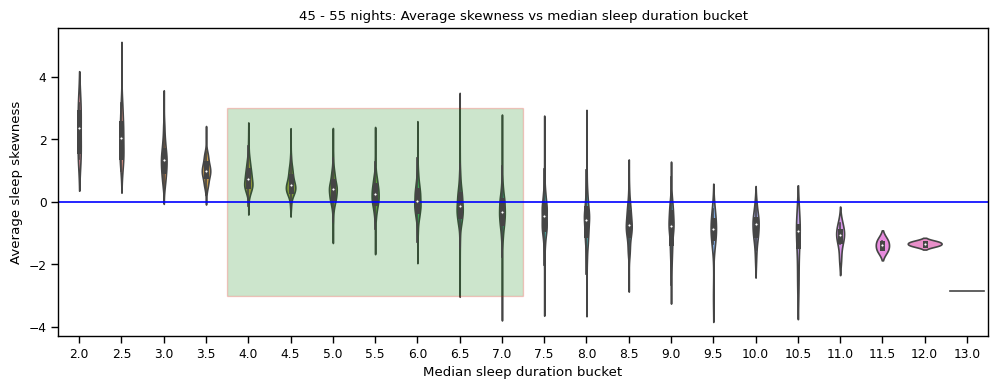

count of users:  4789


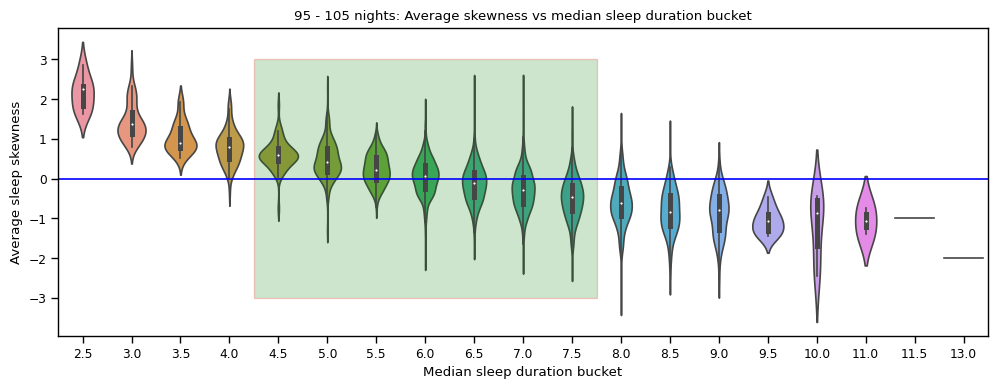

count of users:  4042


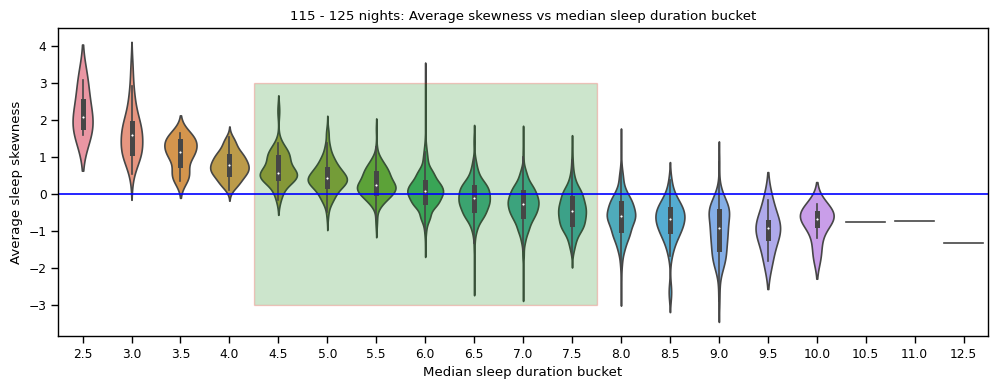

count of users:  697


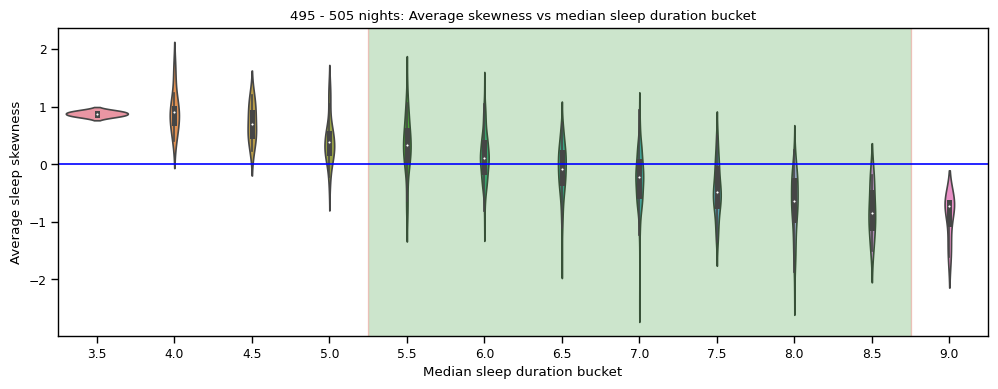

In [15]:
median_sleep_vs_skew_plots(50)
median_sleep_vs_skew_plots(100)
median_sleep_vs_skew_plots(120)
median_sleep_vs_skew_plots(500)

In [16]:
means = pd.read_csv("/data/work/shared/s210142/means.csv")
means.drop(columns=["Unnamed: 0"],inplace=True)
means.columns = ['user_id','sleep_duration_median','sleep_duration_skew']
means['sleep_dur_median_bucket']= np.round(means['sleep_duration_median']*2)/2
import matplotlib.patches as mpatches
def ge_median_sleep_vs_skew_plots(num_nights):
    sleep_nights = sleep_sample[sleep_sample['user_id'].isin(
        user_counting_nights[(user_counting_nights['NightCount']>= num_nights)]['user_id'])][['user_id']].drop_duplicates()
    print("count of users: ",len(sleep_nights))
    means2 = means.merge(sleep_nights,how='inner',left_on='user_id',right_on='user_id')
    fig,ax = plt.subplots(figsize=(12,4))
    sns.violinplot(data = means2, x= means2['sleep_dur_median_bucket'],y= means2['sleep_duration_skew'],axs=ax)
    plt.axhline(y=0,color='b',linestyle='-')
    rect = mpatches.Rectangle((3.5,-3.0),7,6,linewidth=1,edgecolor='r',facecolor='green',alpha=0.2)
    ax.add_patch(rect)
    txt = ">="+str(num_nights)+" nights: Average skewness vs median sleep duration bucket" 
    plt.title(txt)
    plt.xlabel("Median sleep duration bucket")
    plt.ylabel("Average sleep skewness")
    plt.show()

count of users:  83591


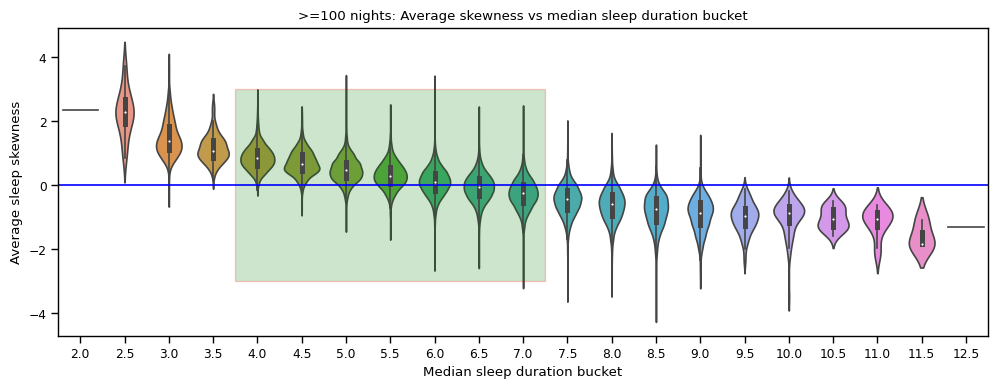

count of users:  53020


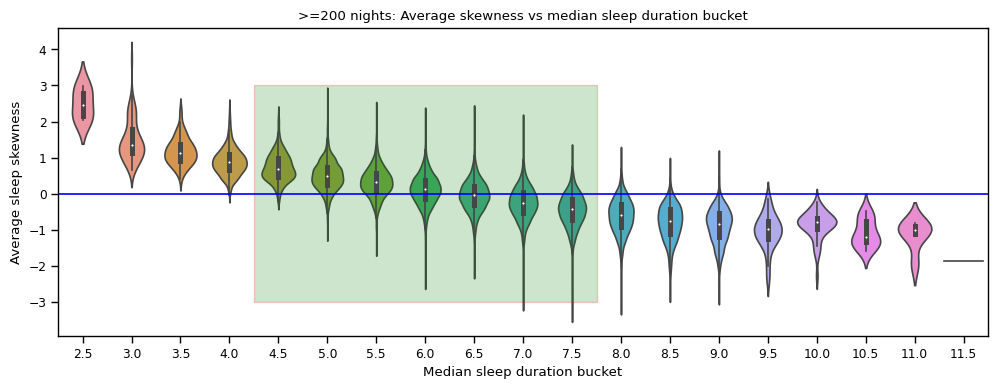

count of users:  17704


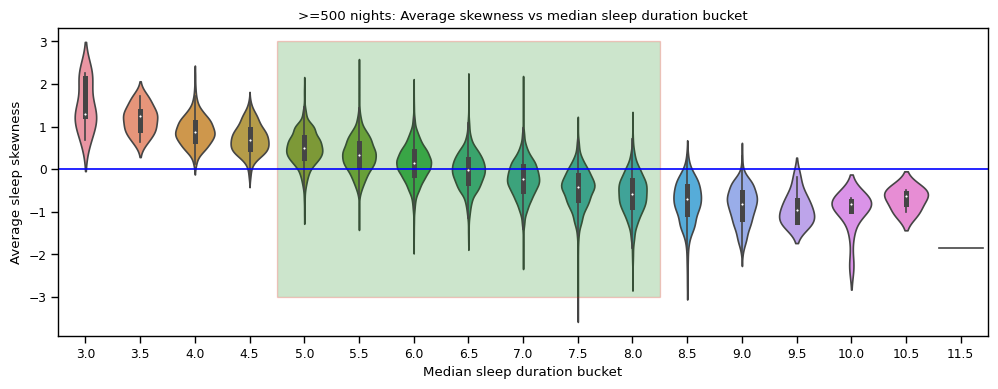

In [17]:
ge_median_sleep_vs_skew_plots(100)
ge_median_sleep_vs_skew_plots(200)
ge_median_sleep_vs_skew_plots(500)

# Taking cut off of >= 500 nights

In [22]:
means['sleep_duration_skew_bucket'] = np.round(means['sleep_duration_skew']*2)/2
means.head(n=2)

user_id  sleep_duration_median  sleep_duration_skew  \
0      1.0                   9.50            -0.466578   
1      2.0                   6.25            -0.355142   

   sleep_dur_median_bucket  sleep_duration_skew_bucket  
0                      9.5                        -0.5  
1                      6.0                        -0.5

In [59]:
means = pd.read_csv("/data/work/shared/s210142/means.csv")
means.drop(columns=["Unnamed: 0"],inplace=True)
means.columns = ['user_id','sleep_duration_median','sleep_duration_skew']
means['sleep_duration_skew_bucket'] = np.round(means['sleep_duration_skew']*2)/2
import matplotlib.patches as mpatches
def ge_median_skew_vs_sleep_plots(num_nights):
    sleep_nights = sleep_sample[sleep_sample['user_id'].isin(
        user_counting_nights[(user_counting_nights['NightCount']>= num_nights)]['user_id'])][['user_id','sleep_duration_round']].drop_duplicates()
    print("count of users: ",len(np.unique(sleep_nights['user_id'])))
    means2 = means.merge(sleep_nights,how='inner',left_on='user_id',right_on='user_id')
    fig,ax = plt.subplots(figsize=(12,4))
    sns.violinplot(data = means2, x= means2['sleep_duration_skew_bucket'],y= means2['sleep_duration_round'],axs=ax)
    plt.axhline(y=6.5,color='b',linestyle='-')
    txt = ">="+str(num_nights)+" nights: Average sleep duration vs median sleep skew bucket" 
    plt.title(txt)
    plt.xlabel("Median sleep skew bucket")
    plt.ylabel("Average sleep duration")
    plt.show()

count of users:  65646


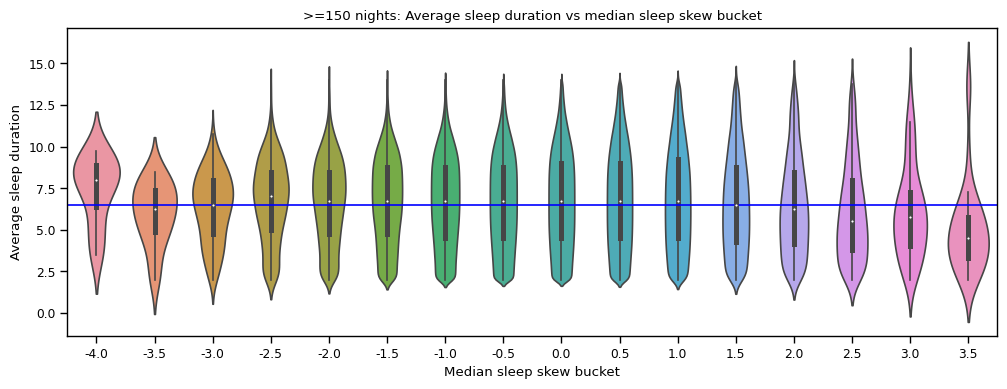

count of users:  17704


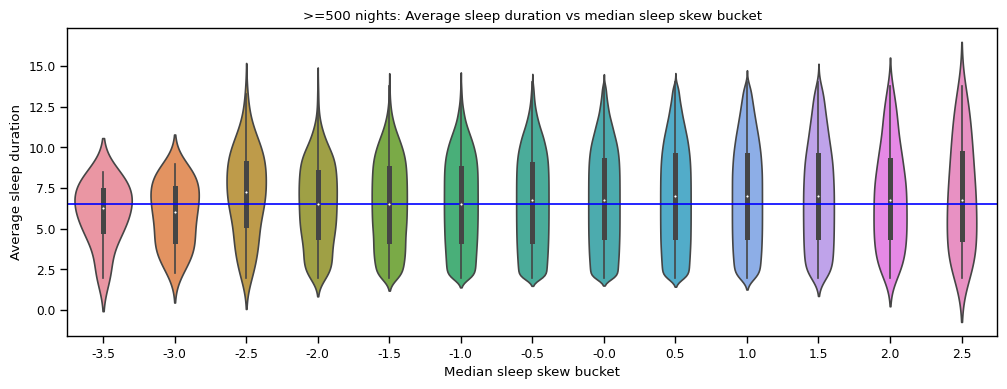

In [60]:
ge_median_skew_vs_sleep_plots(150)
ge_median_skew_vs_sleep_plots(500)

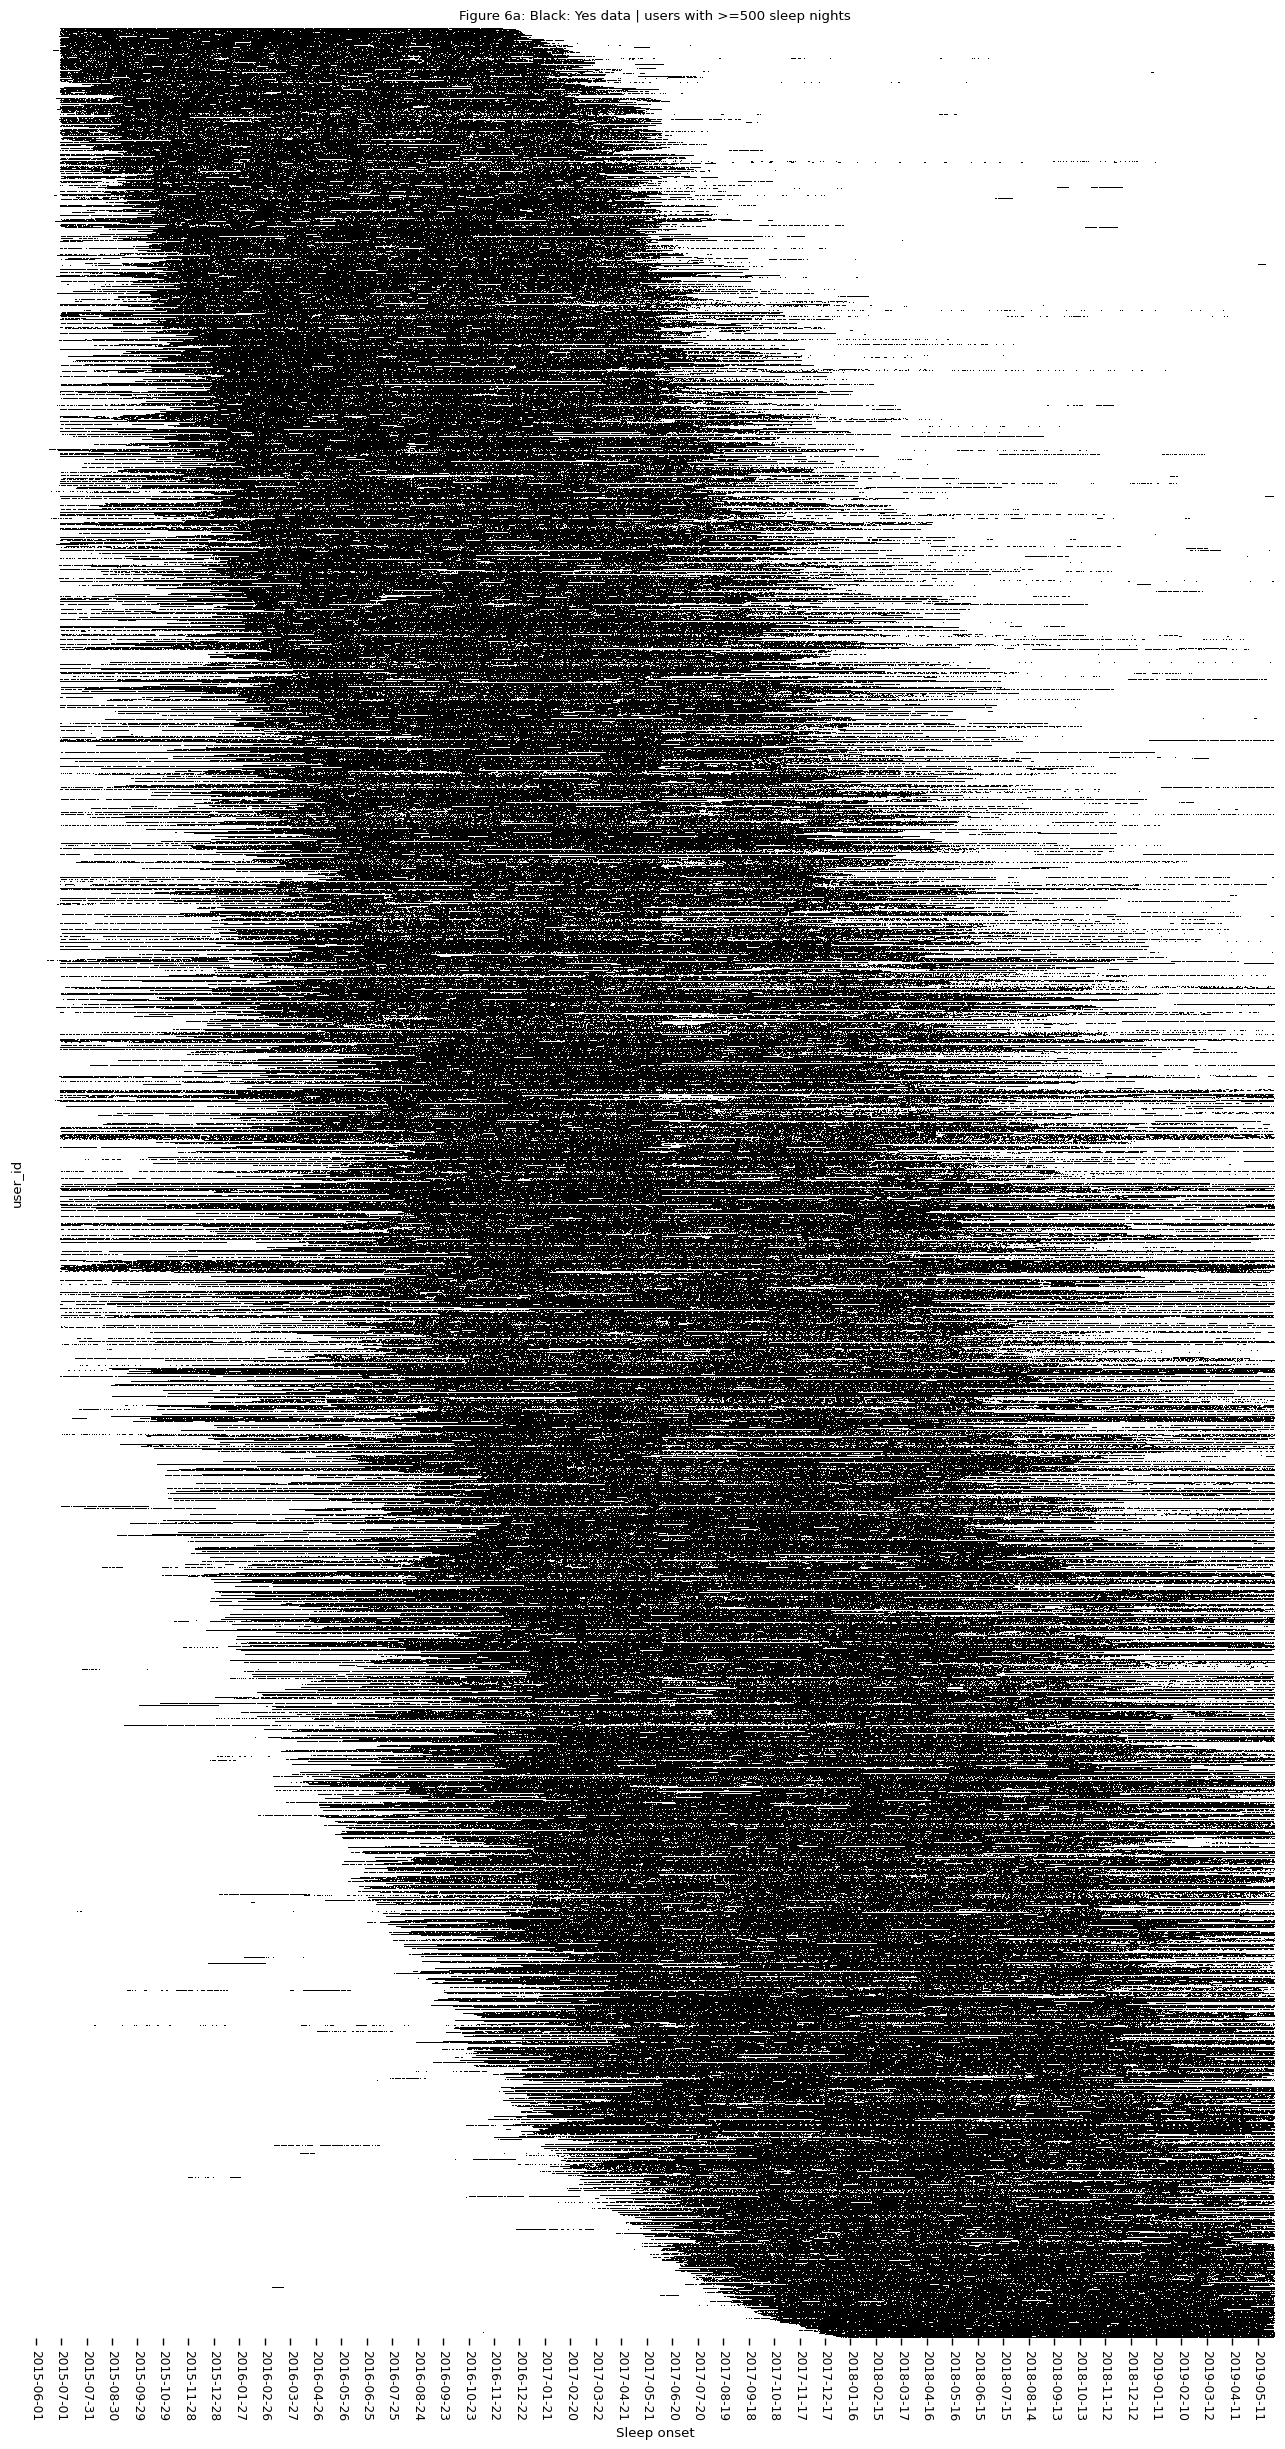

In [58]:
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.dates as mdates
binary_colors = ['white','black']
my_colors = ListedColormap(binary_colors)
bounds = [0,1]
my_norm = BoundaryNorm(bounds,ncolors=len(binary_colors))

num_nights=500
sleep_nights_userid = sleep_sample[sleep_sample['user_id'].isin(
        user_counting_nights[(user_counting_nights['NightCount']>= num_nights)]['user_id'])][['user_id']].drop_duplicates()


fig,axs = plt.subplots(figsize=(16,30))
sns.set_context("paper")
sns.heatmap(user_sleep_days_pivot[user_sleep_days_pivot.index.isin(sleep_nights_userid['user_id'])],ax = axs,
            yticklabels=False,
            xticklabels=30,
            cmap = my_colors,
            norm = my_norm,
            cbar = False)
plt.xticks(rotation=-90)
plt.xlabel("Sleep onset")
plt.title("Figure 6a: Black: Yes data | users with >=500 sleep nights")

plt.show()

count of users:  65646


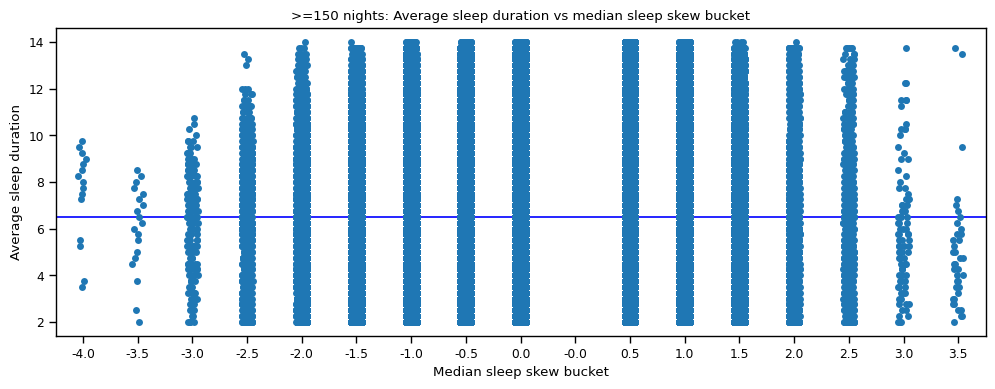

count of users:  17704


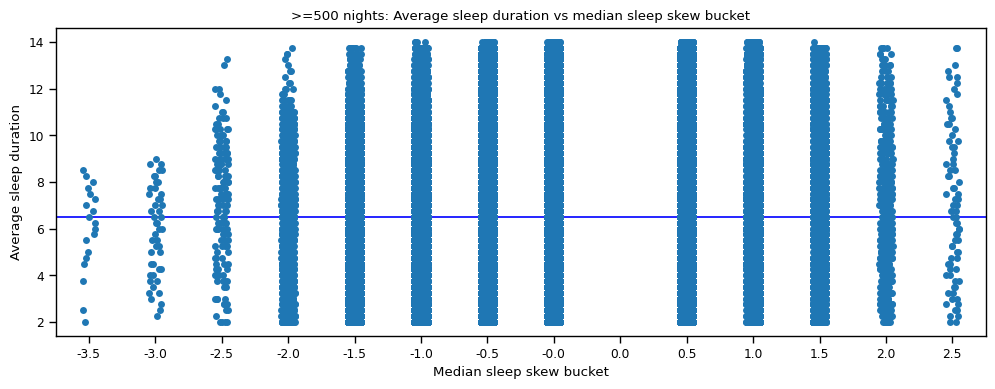

In [63]:
means = pd.read_csv("/data/work/shared/s210142/means.csv")
means.drop(columns=["Unnamed: 0"],inplace=True)
means.columns = ['user_id','sleep_duration_median','sleep_duration_skew']
means['sleep_duration_skew_bucket'] = np.round(means['sleep_duration_skew']*2)/2
import matplotlib.patches as mpatches
def ge_median_skew_vs_sleep_jitter(num_nights):
    sleep_nights = sleep_sample[sleep_sample['user_id'].isin(
        user_counting_nights[(user_counting_nights['NightCount']>= num_nights)]['user_id'])][['user_id','sleep_duration_round']].drop_duplicates()
    print("count of users: ",len(np.unique(sleep_nights['user_id'])))
    means2 = means.merge(sleep_nights,how='inner',left_on='user_id',right_on='user_id')
    fig,ax = plt.subplots(figsize=(12,4))
    sns.stripplot(data = means2, x= means2['sleep_duration_skew_bucket'],y= means2['sleep_duration_round'])
    plt.axhline(y=6.5,color='b',linestyle='-')
    txt = ">="+str(num_nights)+" nights: Average sleep duration vs median sleep skew bucket" 
    plt.title(txt)
    plt.xlabel("Median sleep skew bucket")
    plt.ylabel("Average sleep duration")
    plt.show()

ge_median_skew_vs_sleep_jitter(150)
ge_median_skew_vs_sleep_jitter(500)

In [ ]:
means = pd.read_csv("/data/work/shared/s210142/means.csv")
means.drop(columns=["Unnamed: 0"],inplace=True)
means.columns = ['user_id','sleep_duration_median','sleep_duration_skew']
means['sleep_duration_skew_bucket'] = np.round(means['sleep_duration_skew']*2)/2
import matplotlib.patches as mpatches
def ge_median_skew_vs_sleep_jitter(num_nights):
    sleep_nights = sleep_sample[sleep_sample['user_id'].isin(
        user_counting_nights[(user_counting_nights['NightCount']>= num_nights)]['user_id'])][['user_id','sleep_duration_round']].drop_duplicates()
    print("count of users: ",len(np.unique(sleep_nights['user_id'])))
    means2 = means.merge(sleep_nights,how='inner',left_on='user_id',right_on='user_id')
    fig,ax = plt.subplots(figsize=(12,4))
    sns.stripplot(data = means2, x= means2['sleep_duration_skew_bucket'],y= means2['sleep_duration_round'])
    plt.axhline(y=6.5,color='b',linestyle='-')
    txt = ">="+str(num_nights)+" nights: Average sleep duration vs median sleep skew bucket" 
    plt.title(txt)
    plt.xlabel("Median sleep skew bucket")
    plt.ylabel("Average sleep duration")
    plt.show()

ge_median_skew_vs_sleep_jitter(500)

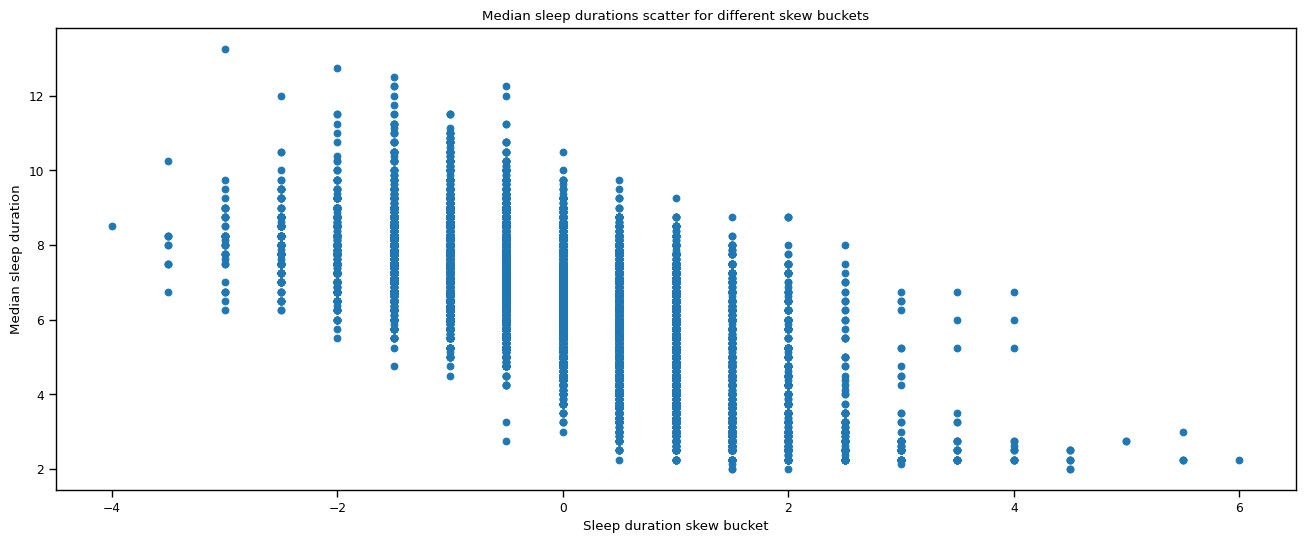

In [87]:
plt.figure(figsize=(16,6))
plt.scatter(means['sleep_duration_skew_bucket'],means['sleep_duration_median'])
plt.xlabel("Sleep duration skew bucket")
plt.ylabel("Median sleep duration")
plt.title("Median sleep durations scatter for different skew buckets")
plt.show()

In [73]:
means['sleep_dur_median_bucket']= np.round(means['sleep_duration_median']*2)/2
means_median_bucket_skew_bucket = pd.DataFrame(means[['sleep_duration_skew_bucket','sleep_dur_median_bucket']].value_counts())
means_median_bucket_skew_bucket = means_median_bucket_skew_bucket.reset_index()

In [75]:
means_median_bucket_skew_bucket_pivot = means_median_bucket_skew_bucket.pivot(
    index='sleep_duration_skew_bucket',
    columns='sleep_dur_median_bucket',
    values = 0)

Text(0.5, 1.0, '# Users in sleep duration median and skew bucket combinations ')

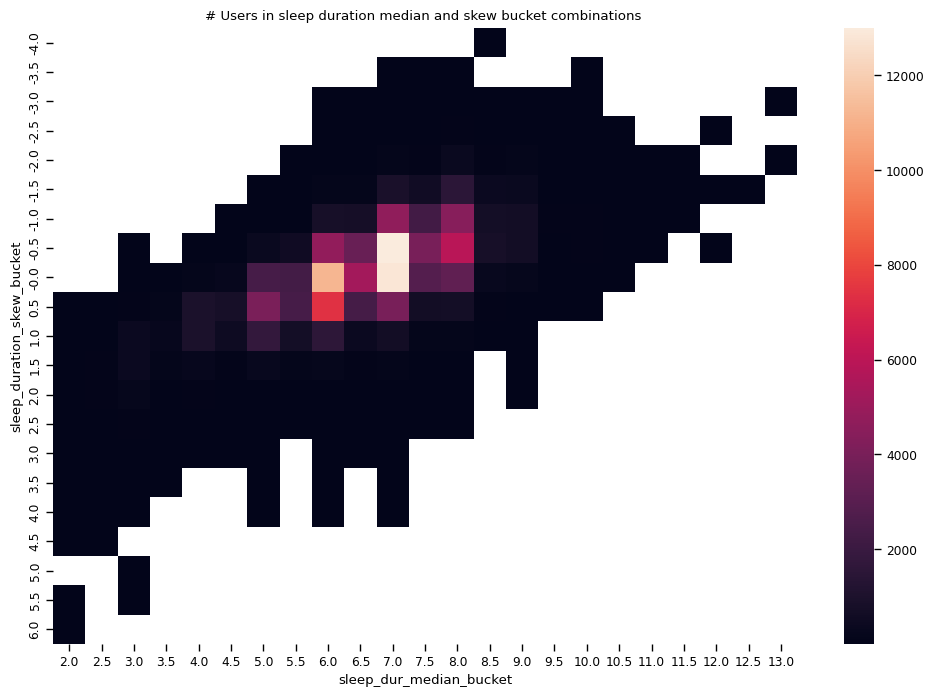

In [78]:
plt.figure(figsize=(12,8))
plt.xlabel("Sleep duration median bucket")
plt.ylabel("Sleep duration skew bucket")
sns.heatmap(means_median_bucket_skew_bucket_pivot)
plt.title("# Users in sleep duration median and skew bucket combinations ")

In [79]:
sleep_sample.head()

user_id  day_label_start  day_label_shift  weekday  weekend  \
0       79            17957            17956        4        1   
1       79            17955            17955        3        0   
2       79            18034            18033        4        1   
3       79            17984            17984        4        1   
4       79            17434            17434        0        0   

   start_time_num_round  end_time_num_round  sleep_duration_round sleep_start  \
0                  0.75                6.75                  6.00  2019-03-02   
1                 23.25                8.25                  8.25  2019-02-28   
2                  1.25                6.75                  5.50  2019-05-18   
3                 13.25               15.50                  2.25  2019-03-29   
4                 13.25               15.75                  2.25  2017-09-25   

  sleep_start_shift  
0        2019-03-01  
1        2019-02-28  
2        2019-05-17  
3        2019-03-29  
4        2017-09-25

In [90]:
sleep_sample[sleep_sample['sleep_duration_round']<=3]

user_id  day_label_start  day_label_shift  weekday  weekend  \
3              79            17984            17984        4        1   
4              79            17434            17434        0        0   
6              79            17480            17480        4        1   
7              79            17589            17588        0        0   
15             79            18037            18036        0        0   
...           ...              ...              ...      ...      ...   
32122193   126463            17567            17567        0        0   
32122214   126463            17324            17324        2        0   
32122363   126463            17919            17918        1        0   
32122402   126463            17905            17905        2        0   
32122581   126962            16891            16891        3        0   

          start_time_num_round  end_time_num_round  sleep_duration_round  \
3                        13.25               15.50                  2.25   
4                        13.25               15.75                  2.25   
6                        13.50               15.75                  2.00   
7                         8.50               11.25                  2.50   
15                        0.75                4.50                  3.00   
...                        ...                 ...                   ...   
32122193                 22.00                1.00                  2.75   
32122214                 22.25                1.25                  3.00   
32122363                  9.75               11.75                  2.00   
32122402                 21.75                0.75                  3.00   
32122581                 22.00                0.50                  2.50   

         sleep_start sleep_start_shift  
3         2019-03-29        2019-03-29  
4         2017-09-25        2017-09-25  
6         2017-11-10        2017-11-10  
7         2018-02-27        2018-02-26  
15        2019-05-21        2019-05-20  
...              ...               ...  
32122193  2018-02-05        2018-02-05  
32122214  2017-06-07        2017-06-07  
32122363  2019-01-23        2019-01-22  
32122402  2019-01-09        2019-01-09  
32122581  2016-03-31        2016-03-31  

[1563131 rows x 10 columns]

In [94]:
means

user_id  sleep_duration_median  sleep_duration_skew  \
0            1.0                  9.500            -0.466578   
1            2.0                  6.250            -0.355142   
2            3.0                  6.750            -0.411414   
3            4.0                  6.500            -0.195224   
4            5.0                  6.375             0.249595   
...          ...                    ...                  ...   
127551  127552.0                  6.000             0.143392   
127552  127553.0                  6.500             0.334352   
127553  127554.0                  6.250            -0.004071   
127554  127555.0                  6.500             0.393785   
127555  127556.0                  6.750            -0.693122   

        sleep_duration_skew_bucket  sleep_dur_median_bucket  
0                             -0.5                      9.5  
1                             -0.5                      6.0  
2                             -0.5                      7.0  
3                             -0.0                      6.5  
4                              0.0                      6.5  
...                            ...                      ...  
127551                         0.0                      6.0  
127552                         0.5                      6.5  
127553                        -0.0                      6.0  
127554                         0.5                      6.5  
127555                        -0.5                      7.0  

[127556 rows x 5 columns]

In [101]:
sleep_sample_dur_lt_3 = sleep_sample[sleep_sample['user_id'].isin(means[means['sleep_dur_median_bucket']<3]['user_id'])]
sleep_sample_dur_lt_3 = sleep_sample_dur_lt_3.reset_index()
sleep_sample_dur_lt_3.sort_values(by=['user_id','sleep_start_shift'],inplace=True)
sleep_sample_dur_lt_3 = sleep_sample_dur_lt_3.reset_index()
sleep_sample_dur_lt_3['day_label_start_lag'] = sleep_sample_dur_lt_3['day_label_start'].shift(-1)
sleep_sample_dur_lt_3[['day_label_start_lag','day_label_start']]
sleep_sample_dur_lt_3.groupby(['user_id',sleep_sample_dur_lt_3'day_label_start_lag'])

day_label_start_lag  day_label_start
0                  17389.0            17357
1                  17392.0            17389
2                  17393.0            17392
3                  17411.0            17393
4                  17427.0            17411
...                    ...              ...
25676              17643.0            17640
25677              17650.0            17643
25678              17657.0            17650
25679              17673.0            17657
25680                  NaN            17673

[25681 rows x 2 columns]